### PROGRAM NAME: Medical eXtended Reality (MXR) Traffic Models
### PROJECT:               FDA 5G MXR Traffic Pattern Recognition and Modeling
### DESCRIPTION

- This Jupyter Notebook provides Python scripts showcasing the MXR traffic models based on trace files collected from the FDA MXR demo applications. Implementation examples in Python codes are also provided.
- Please refer to our papers for more details on modeling MXR traffic patterns and utilizing these models.

[1] Y. Liu and M. O. Al Kalaa, "Link-Level Traffic Modeling of Medical Extended Reality (MXR) Applications," in IEEE Access, vol. 12, pp. 39166-39185, 2024, DOI: 10.1109/ACCESS.2024.3374230.

[2] T. Ropitault, Y. Liu, R. Rouil, and M. O. Al Kalaa, "A Simulation Study of mmWave 5G-enabled Medical Extended Reality (MXR)", in Proc. IEEE ICC 2024, Denver, CO, Jun. 2024.

### PROGRAMMER: YONGKANG LIU (FDA/CDRH/OSEL/DBP, yongkang.liu@fda.hhs.gov)
### Python-VERSION: 3.8.5 (checked by running sys.version_info)
### UPDATES
- 08/28/2023, Version 0.5, basic examples with the brief introduction.
- 06/28/2024, Version 1.0.


## FDA software disclaimer
#### *This software and documentation (the "Software") were developed at the Food and Drug Administration (FDA) by employees of the Federal Government in the course of their official duties. Pursuant to Title 17, Section 105 of the United States Code, this work is not subject to copyright protection and is in the public domain. Permission is hereby granted, free of charge, to any person obtaining a copy of the Software, to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, or sell copies of the Software or derivatives, and to permit persons to whom the Software is furnished to do so. FDA assumes no responsibility whatsoever for use by other parties of the Software, its source code, documentation or compiled executables, and makes no guarantees, expressed or implied, about its quality, reliability, or any other characteristic. Further, use of this code in no way implies endorsement by the FDA or confers any advantage in regulatory decisions. Although this software can be redistributed and/or modified freely, we ask that any derivative works bear some notice that they are derived from it, and any modified versions bear some notice that they have been modified.*

In [1]:
!jupyter --version


Selected Jupyter core packages...
IPython          : 8.20.0
ipykernel        : 6.28.0
ipywidgets       : 7.6.5
jupyter_client   : 8.6.0
jupyter_core     : 5.5.0
jupyter_server   : 2.10.0
jupyterlab       : 4.0.11
nbclient         : 0.8.0
nbconvert        : 7.10.0
nbformat         : 5.9.2
notebook         : 7.0.8
qtconsole        : 5.4.2
traitlets        : 5.7.1


# 1. Link-Level MXR Traffic Modeling

## 1.1 Overview of MXR Applications in the Models

<!--
![alt text](fig_mxr_use_cases.png "MXR Use Cases in Traffic Collection")
-->

| ![alt text](fig_mxr_use_cases.png "MXR Use Cases in Traffic Collection") | 
|:--:| 
|Figure 1.1 MXR Use Cases in Traffic Collection. |


Shown in Figure 1.1 above, this Jupyter notebook introduces three different types of MXR use cases along with their unique traffic patterns and generation models. The use cases are differentiated by the roles of the MXR head-mounted display (HMD) devices. 

- The **Full Function Headset (FFH)** scenario considers the HMD device equipped with local virtual content rendering capability including both the processing power and content libraries (e.g., patient profiles) so that FFH user only needs very limited communication traffic to be synced with the remote server. 

- The **Reduced Function Headset (RFH)**, on the contrary, considers the opporsite case where the HMD device serves the end user more like an I/O device that mainly relies on the external rendering machine to generate the virtual content and stream it down to display. The potential benefits of using RFH include less device complexity, low power consumption (that means longer work time between battery recharges), and centralized control/service management. However, such devices request more communication bandwidth and stricter latency requirements to be seamlessly connected with the rendering machines deployed nearby, on the edge, or in the cloud.

- The **Headset as a Mirroring Server (HMS)** considers the service scenarios where the HMD device's view can be shared with external users through video streaming. In many MXR applications, external users need to access the HMD user's field of view for different purposes, e.g., learning the mentor's practices from the personal point of view or evaluate the patient reactions in rehabilitation sessions.


## 1.2 Traffic Modeling Workflow

| ![alt text](workflow.png "Data-oriented workflow for MXR link traffic modeling [1, Fig. 2]") | 
|:--:| 
|Figure 1.2 Data-oriented workflow for MXR link traffic modeling [1, Fig. 2] |

As shown in Figure 1.2, the traffic modeling process consists of five main stages including __traffic measurement, data pre-processing, data exploration, traffic modeling, and model validation__. In this Jupyter Notebook, implementation examples are provided for individual stages. Please refer to Reference [1] for further details.

### 1.2.1 Traffic Measurement

| ![alt text](traffic_measurement.png "MXR link traffic measurement in a local area network (LAN) setup") | 
|:--:| 
|Figure 1.3. MXR link traffic measurement in a local area network (LAN) setup for the Full Function Headset (FFH) use case. [1, Fig. 3] |


The traffic in an application link can be captured with a local area network (LAN) setup, enabling the capture of traffic patterns with minimal interference from diverse connectivity factors, such as packet loss, significant transmission delays, and variable bandwidth capacity. Each measurement is recommended to focus on evaluating the traffic between only a pair of device nodes connected by a LAN link. 

As shown in Figure 1.3, traffic is captured at both ends of the measured link, either directly at the Ethernet adapter or via a network test access point (TAP) device to replicate traffic passing through the measurement point close to the end node. Network packets are then timestamped and saved in packet capture (PCAP) files for analysis. The traffic flows within the link are analyzed as two distinct streams, referred to as downstream and upstream, respectively. In the context of client-server communication, the flow from the client node to the server is designated as downstream, while the flow in the opposite direction is identified as upstream. In each directional stream, measure traffic data is further processed by separating the Upstream Traffic (UT) data at the client end and the Downstream Traffic (DT) data at the server end. 

### 1.2.2 Data Pre-Processing

The data wrangling starts with the raw PCAP files. Using network traffic analysis tools, such as Wireshark and tshark, we can extract the DT and UT traffic packet captures from the PCAP files by applying packet filters. For instance, we can apply the filter "ip.src == [client_IP] && ip.dst == [server_IP] && UDP" to keep all UDP-typed UT traffic packets. The filtered packets can be exported to a new PCAP file with a reduced size.

Next, we can utilize the network packet parsing tools, e.g., Wireshark/tshark or specific libraries such as pypcapkit in Python, to parse and save selected network protocol header information into CSV files for the extracted traffic packets.

The following cell provides an example that uses the tshark parsing command to obtain selected network protocol (Ethernet/IP/UDP/TCP) header field information. The source file is dl_filtered.pcapng and the destination file is dl_filtered.csv that is included in this repo under /RFH.

### 1.2.3 Data Exploration

Exploratory data analysis is performed to obtain preliminary traffic pattern features, e.g., statistical or timeseries. The detected patterns will inform the development of traffic model(s) that depict how the application data was generated.

### 1.2.4 Traffic Modeling

We mainly consider two traffic pattern variables in developing the models, which are the traffic block size (TBS) and inter-traffic-block time (ITBT). Please see the concluded traffic models for DT/UT data streams of three MXR use case examples in the next section.

Notably, the traffic capture on a link can be composed of multiple parallel data flows for different purposes. These can be decomposed into unique flows, and each characterized with a standalone model. In addition, it is also difficult to generalize the traffic observations of an investigated connected medical device and consider those observations applicable to an entire class of devices. Therefore, the intended use of a certain device, its design, use of data, and how it incorporates the connectivity infrastructure are factors that influence the device connectivity requirements and the traffic patterns it generates.

Please refer to Reference [1] for further discussions on the modeing details. Two examples are provided in this repo under /RFH for modeling RFH DT and UT traffic patterns.

### 1.2.5 Model Validation

Models can be validated by comparing the actual link traffic traces with the simulated ones using the model given short and long-term performance metrics, e.g., throughput. 

In the remainder of this Jupyter Notebook, we will introduce the traffic models for three MXR link examples, showcase implementation procedures, and discuss the results. Specifically, Section 2 addresses FFH DT and UT traffic models; Section 3 addresses RFH DT and UT traffic models; Section 4 addresses the HMS DT traffic model. 

# 2. FFH Traffic Models

The FFH traffic between the HMD device and the remote MXR server is modeled here. The traffic is identified
in both directions, i.e., the downstream traffic from the server to the user/client and the upstream traffic from the user/client to the server. Each directional traffic is modeled separately. 

| ![alt text](fig_ffh_patterns_illustrated.png "FFH downstream and upstream traffic patterns illustrated") | 
|:--:| 
| *Figure 2. FFH downstream and upstream traffic patterns illustrated* |

As illustrated in Figure 2, the FFH Downstream model is based on the distributions of frame size and inter-frame time (IFT), which are statistically decoupled from each other. On the contrary, the FFH Upstream model is based on its own IFT distribution with a single, fixed frame size.

## 2.1. FFH Downstream


### 2.1.1. Frame Timing

Each single frame is generated randomly following the previous one. The inter-frame time can be modeled by the empirical CDF shown below.


sys.version_info(major=3, minor=11, micro=7, releaselevel='final', serial=0)
        ift       cdf
0  7.695198  0.000034
1  7.727966  0.000137
2  7.760735  0.000240
3  7.793503  0.000378
4  7.826271  0.000446
5  7.859039  0.000515
6  7.891808  0.000652
7  7.924576  0.000892
8  7.957344  0.001133
9  7.990112  0.001716
          ift       cdf
90  10.644341  0.999794
91  10.677109  0.999828
92  10.709877  0.999863
93  10.742645  0.999863
94  10.775414  0.999863
95  10.808182  0.999863
96  10.840950  0.999897
97  10.873718  0.999931
98  10.906487  0.999931
99  10.939255  0.999966


(7.0, 12.0)

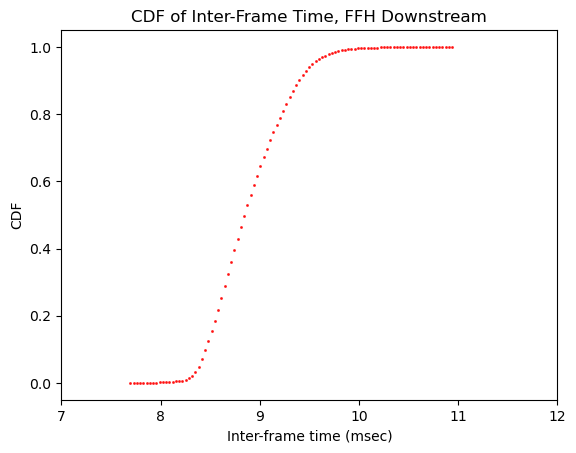

In [2]:
# General function libraries
import sys
print(sys.version_info)
import pandas as pd
import fnmatch
import os
import csv
import matplotlib.pyplot as plt
import numpy as np


df_ffh_ift = pd.read_csv('ffh_ds_ift_msec_cdf.csv', delimiter=";")

print(df_ffh_ift.head(10))

print(df_ffh_ift.tail(10))

lst_ift_msec = df_ffh_ift.ift.tolist()
lst_ift_sec = [i/1000 for i in lst_ift_msec]
lst_ift_cdf = df_ffh_ift.cdf.tolist()

_, ax = plt.subplots()
ax.scatter(lst_ift_msec, lst_ift_cdf, s = 5, color = 'r', alpha = 0.75, marker='.')
ax.set_title("CDF of Inter-Frame Time, FFH Downstream")
ax.set_xlabel("Inter-frame time (msec)")
ax.set_ylabel("CDF")
x_xlim = [7, 12]
ax.set_xlim(x_xlim[0], x_xlim[1])    
# ax.set_xticks(np.arange(x_xlim[0], x_xlim[1], np.round_((x_xlim[1]-x_xlim[0])/10)))    


### 2.1.2. Frame Size

The frame size is randomly selected from a limited set where each element represents a unique combination of update messages generated by the server for the user/client. Based on the collected data, the model adopts five different frame sizes, which are zero (means no update at the frame moment), 10 bytes, 21 bytes, 37 bytes, and 48 bytes. A Markov chain model is used to model the transitions between any two frame sizes.


In [3]:
frame_sizes = [10, 21, 37, 48, 0] # in bytes, as State 0, 1, 2, 3, 4, respectively

## Transition probability matrix
# (state.curr, state.next)
# (0, 0), (0, 1), (0, 2), (0, 3), (0, 4)
# (1, 0), (1, 1), (1, 2), (1, 3), (1, 4)
# (2, 0), (2, 1), (2, 2), (2, 3), (2, 4)
# (3, 0), (3, 1), (3, 2), (3, 3), (3, 4)
# (4, 0), (4, 1), (4, 2), (4, 3), (4, 4)
p_transit_mat = [[0.0006989341254586755, 0.006989341254586755, 0.8301590075135419, 0.09243403809190984, 0.06971867901450288], 
                 [0.24328954882924042, 0.0005711022272986865, 0.7035979440319817, 0.0005711022272986865, 0.051970302684180465], 
                 [0.2672921184227995, 0.05460901889631367, 0.32079479576934994, 0.0358897198743196, 0.32141434703721733], 
                 [0.29923273657289, 0.0017050298380221654, 0.340153452685422, 0.0012787723785166241, 0.3576300085251492], 
                 [0.4677914110429448, 0.04732690622261174, 0.4180543382997371, 0.051818580192813324, 0.015008764241893076]]

# Corresponding CDF
cdf_transit_mat = [[0, 0.0006989341254586755, 0.0076882753800454305, 0.8378472828935873, 0.9302813209854972], 
                [0, 0.24328954882924042, 0.24386065105653912, 0.9474585950885208, 0.9480296973158195], 
                [0, 0.2672921184227995, 0.3219011373191132, 0.6426959330884632, 0.6785856529627827], 
                [0, 0.29923273657289, 0.3009377664109122, 0.6410912190963343, 0.6423699914748509], 
                [0, 0.4677914110429448, 0.5151183172655566, 0.9331726555652937, 0.984991235758107]]

# State stationary probability
p_stationary_rowvec = [0.242, 0.037, 0.478, 0.05,  0.193]

cdf_stationary_rowvec = [0, 0.242, 0.27899999999999997, 0.7569999999999999, 0.8069999999999999]


### 2.1.3. Implementation Example in Python


Step 1: Initial frame size
Frame sizes:  [10, 21, 37, 48, 0]
CDF of stationary prob.: [0, 0.242, 0.27899999999999997, 0.7569999999999999, 0.8069999999999999]
Initial frame size is  48
Transition prob matrix:  [[0.0006989341254586755, 0.006989341254586755, 0.8301590075135419, 0.09243403809190984, 0.06971867901450288], [0.24328954882924042, 0.0005711022272986865, 0.7035979440319817, 0.0005711022272986865, 0.051970302684180465], [0.2672921184227995, 0.05460901889631367, 0.32079479576934994, 0.0358897198743196, 0.32141434703721733], [0.29923273657289, 0.0017050298380221654, 0.340153452685422, 0.0012787723785166241, 0.3576300085251492], [0.4677914110429448, 0.04732690622261174, 0.4180543382997371, 0.051818580192813324, 0.015008764241893076]]
Transition prob matrix (CDF):  [[0, 0.0006989341254586755, 0.0076882753800454305, 0.8378472828935873, 0.9302813209854972], [0, 0.24328954882924042, 0.24386065105653912, 0.9474585950885208, 0.9480296973158195], [0, 0.2672921184227995, 0.3219011373191132,

C:\Users\Yongkang.Liu\AppData\Local\Temp\1\ipykernel_12368\1024506763.py:90: DeprecationWarning: `round_` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `round` instead.
  frame_time_next = frame_next_time_gen_dl(frame_time_curr, lst_ift_cdf, lst_ift_sec)
C:\Users\Yongkang.Liu\AppData\Local\Temp\1\ipykernel_12368\1024506763.py:106: DeprecationWarning: `round_` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `round` instead.
  frame_time_next = frame_next_time_gen_dl(frame_time_curr, lst_ift_cdf, lst_ift_sec)


Simulated traffic is done!
[[999.90318, 37], [999.91199, 37], [999.9208, 37], [999.92961, 37], [999.93911, 0], [999.94861, 48], [999.95811, 0], [999.96761, 48], [999.97711, 0]]


(0.0, 30.0)

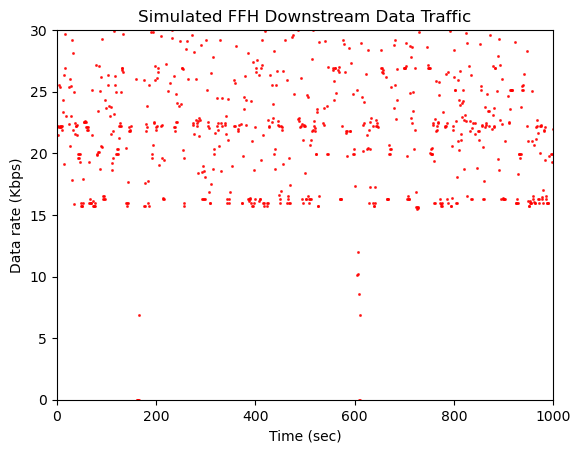

In [4]:
import random
import time


# given an empirical CDF list, return the index of a random variable following the CDF
def rand_index_gen(lst_cdf):
    random.seed(int(str(time.time()).split('.')[1]))
    random.uniform(0, 1)
#     print("Input CDF curve: ", lst_cdf)
    tmp_rand = random.uniform(0, 1) # generate a random number between 0 and 1
#     print("ramdom number in [0, 1]: ", tmp_rand)
    
    # the input, lst_cdf, is supported to be sorted in the ascending order
    lst_less_eq = [i for i in lst_cdf if i <= tmp_rand]
#     print(lst_less_eq)
    
    idx_return = len(lst_less_eq)-1
    
#     print("random number {} picks index {}".format(tmp_rand, idx_return))
    
    return idx_return


# given the predefined state list and state transition probability, return the next state from the current state
def frame_size_gen_dl(in_state_last, in_state_lst, in_transit_prob_cdf_mat):
    # initiate the returned value
    out_state_next = in_state_last
    
    # Obtain the last size state index
    tmp_state_last_idx = in_state_lst.index(in_state_last)
    # Use the index to select the transition probability CDF curve
    tmp_transit_prob_lst= in_transit_prob_cdf_mat[tmp_state_last_idx]
    # Given the CDF curve, generate the index of a random variable following the selected CDF
    tmp_state_next_idx = rand_index_gen(tmp_transit_prob_lst)
    # Find the size state per the randomly generated state index
    out_state_next = in_state_lst[tmp_state_next_idx]
    
    return out_state_next


# given the interval CDF, return the next frame time from the current frame time (in unit of sec)
def frame_next_time_gen_dl(in_time_curr, in_interval_cdf, in_interval_range):
    tmp_frame_interval_idx = rand_index_gen(in_interval_cdf)
#     print("in func: index: ", tmp_frame_interval_idx)
    tmp_frame_interval_gen = in_interval_range[tmp_frame_interval_idx]
#     print("in func: interval: ", tmp_frame_interval_gen)
    out_time_next = in_time_curr + tmp_frame_interval_gen
    out_time_next = np.round_(out_time_next, decimals=5)
#     print("in func: new frame time: ", out_time_next)
    
    return out_time_next



## According to the obtained stationary distribution and transition probability matrix to simulate the DL traffic


sim_mat = [] # store the simulated frame size and time instances per the distribution of the samples


# Step 1. Determine the initial frame size
# Generate a random number, and pick the initial frame size according to the stationary distribution

print("Step 1: Initial frame size")
# Given the CDF of stationary distribution
print("Frame sizes: ", frame_sizes)
print("CDF of stationary prob.:", cdf_stationary_rowvec)

# Decide the initial frame size
frame_size_curr_idx = rand_index_gen(cdf_stationary_rowvec)
frame_size_curr = frame_sizes[frame_size_curr_idx]
print("Initial frame size is ", frame_size_curr)

frame_time_curr = 0


# Step 2. Determine the next frame size
# According to the selected current frame size and the transition vector to select the next frame size

print("Transition prob matrix: ", p_transit_mat)
print("Transition prob matrix (CDF): ", cdf_transit_mat)

frame_size_nxt = frame_size_gen_dl(frame_size_curr, frame_sizes, cdf_transit_mat)

print("Current frame size: {}, Next frame size: {}".format(frame_size_curr, frame_size_nxt))


# Step 3. Determine the interval length from the current frame to the next frame 
frame_time_curr = 0
frame_time_next = frame_next_time_gen_dl(frame_time_curr, lst_ift_cdf, lst_ift_sec)
# print("Current frame time: {}, Next frame time: {}".format(frame_time_curr, frame_time_next))

sim_mat = []
sim_stop_time = 1000

while frame_time_next < sim_stop_time:
#     print("Current frame size: {}, frame time: {}".format(frame_size_curr, frame_time_curr))
    sim_mat.append([frame_time_curr, frame_size_curr])
    
    frame_size_curr = frame_size_nxt    
    frame_size_nxt = frame_size_gen_dl(frame_size_curr, frame_sizes, cdf_transit_mat)

#     print("Current time: {},__ Next time: {}".format(frame_time_curr, frame_time_next))
    
    frame_time_curr = frame_time_next
    frame_time_next = frame_next_time_gen_dl(frame_time_curr, lst_ift_cdf, lst_ift_sec)

print("Simulated traffic is done!")

print(sim_mat[-10:-1])
    
    
# Throughput of the simulated data stream
# The simulated frame time is in sec.

step = 1 # sec

start_time = 0
end_time = sim_mat[-1][0] 
arr_time = np.arange(start_time, end_time, step = step)
arr_time[1]

# for i in arr_time:
#     print(i)
    
lst_byte = [0 for i in range(len(arr_time))]

# print(lst_rate)

import math

for i in sim_mat:
    len_tmp = i[1]
    time_tmp = i[0] 
    idx = math.ceil(time_tmp / step)
    lst_byte[idx-1] += len_tmp
    


lst_rate_kbps = [i * 8 / step / 1000 for i in lst_byte]


_, ax = plt.subplots()
ax.scatter(arr_time, lst_rate_kbps, s = 5, color = 'r', alpha = 0.75, marker='.')
ax.set_title("Simulated FFH Downstream Data Traffic")
ax.set_xlabel("Time (sec)")
ax.set_ylabel("Data rate (Kbps)")
x_xlim = [0, arr_time[-1]+1]
ax.set_xlim(x_xlim[0], x_xlim[1])  
ax.set_ylim(0, 30) 
# ax.set_xticks(np.arange(x_xlim[0], x_xlim[1], np.round_((x_xlim[1]-x_xlim[0])/10)))   

## 2.2. FFH Upstream

### 2.2.1. Frame Timing

Similar to the downstream case, the IFT in the upstream is illustrated following an empirical distribution.



sys.version_info(major=3, minor=11, micro=7, releaselevel='final', serial=0)
        ift       cdf
0  8.398056  0.000040
1  8.505204  0.000159
2  8.612351  0.000239
3  8.719499  0.000359
4  8.826647  0.000518
5  8.933794  0.000797
6  9.040942  0.000877
7  9.148090  0.000917
8  9.255238  0.000996
9  9.362385  0.001196
           ift       cdf
190  28.756118  0.999641
191  28.863266  0.999641
192  28.970413  0.999681
193  29.077561  0.999681
194  29.184709  0.999761
195  29.291856  0.999761
196  29.399004  0.999761
197  29.506152  0.999761
198  29.613299  0.999841
199  29.720447  0.999880


(8.0, 30.0)

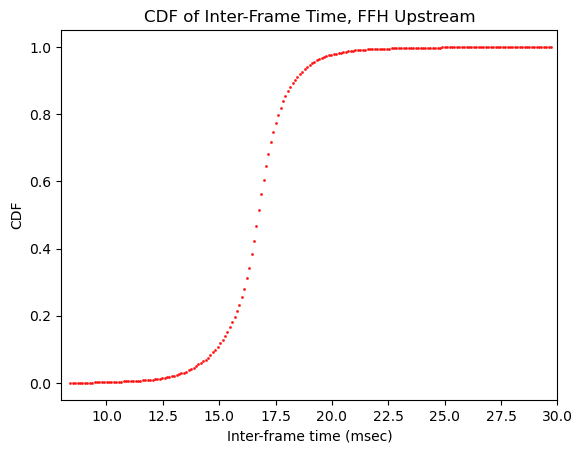

In [5]:
# General function libraries
import sys
print(sys.version_info)
import pandas as pd
import fnmatch
import os
import csv
import matplotlib.pyplot as plt
import numpy as np


df_ffh_us_ift = pd.read_csv('ffh_us_ift_msec_cdf.csv', delimiter=";")

print(df_ffh_us_ift.head(10))

print(df_ffh_us_ift.tail(10))

lst_ift_msec = df_ffh_us_ift.ift.tolist()
lst_ift_sec = [i/1000 for i in lst_ift_msec]
lst_ift_cdf = df_ffh_us_ift.cdf.tolist()

_, ax = plt.subplots()
ax.scatter(lst_ift_msec, lst_ift_cdf, s = 5, color = 'r', alpha = 0.75, marker='.')
ax.set_title("CDF of Inter-Frame Time, FFH Upstream")
ax.set_xlabel("Inter-frame time (msec)")
ax.set_ylabel("CDF")
x_xlim = [8, 30]
ax.set_xlim(x_xlim[0], x_xlim[1])    
# ax.set_xticks(np.arange(x_xlim[0], x_xlim[1], np.round_((x_xlim[1]-x_xlim[0])/10)))   

### 2.2.2. Frame Size

There is only one single frame size in the upstream messages with the fixed 39 bytes each.

### 2.2.3. Implementation Example in Python

Simulated traffic is done!
[[99.85165, 39], [99.86648, 39], [99.88131, 39], [99.89614, 39], [99.91097, 39], [99.9258, 39], [99.94063, 39], [99.95546, 39], [99.97029, 39]]


C:\Users\Yongkang.Liu\AppData\Local\Temp\1\ipykernel_12368\2342501137.py:3: DeprecationWarning: `round_` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `round` instead.
  frame_time_next = frame_next_time_gen_dl(frame_time_curr, lst_ift_cdf, lst_ift_sec)
C:\Users\Yongkang.Liu\AppData\Local\Temp\1\ipykernel_12368\2342501137.py:17: DeprecationWarning: `round_` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `round` instead.
  frame_time_next = frame_next_time_gen_dl(frame_time_curr, lst_ift_cdf, lst_ift_sec)


(0.0, 30.0)

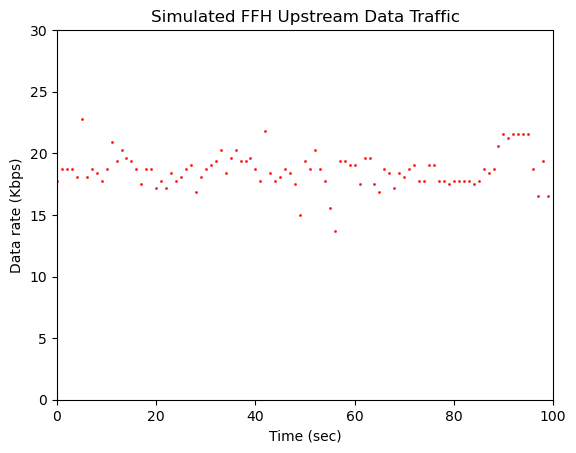

In [6]:
#Determine the interval length from the current frame to the next frame 
frame_time_curr = 0
frame_time_next = frame_next_time_gen_dl(frame_time_curr, lst_ift_cdf, lst_ift_sec)
# print("Current frame time: {}, Next frame time: {}".format(frame_time_curr, frame_time_next))

frame_size_fixed = 39

sim_mat = []
sim_stop_time = 100

while frame_time_next < sim_stop_time:

    sim_mat.append([frame_time_curr, frame_size_fixed])   

    
    frame_time_curr = frame_time_next
    frame_time_next = frame_next_time_gen_dl(frame_time_curr, lst_ift_cdf, lst_ift_sec)   
    
print("Simulated traffic is done!")

print(sim_mat[-10:-1])
    
    
# Throughput of the simulated data stream
# The simulated frame time is in sec.

step = 1 # sec

start_time = 0
end_time = sim_mat[-1][0] 
arr_time = np.arange(start_time, end_time, step = step)
arr_time[1]

# for i in arr_time:
#     print(i)
    
lst_byte = [0 for i in range(len(arr_time))]

# print(lst_rate)

import math

for i in sim_mat:
    len_tmp = i[1]
    time_tmp = i[0] 
    idx = math.ceil(time_tmp / step)
    lst_byte[idx-1] += len_tmp
    


lst_rate_kbps = [i * 8 / step / 1000 for i in lst_byte]


_, ax = plt.subplots()
ax.scatter(arr_time, lst_rate_kbps, s = 5, color = 'r', alpha = 0.75, marker='.')
ax.set_title("Simulated FFH Upstream Data Traffic")
ax.set_xlabel("Time (sec)")
ax.set_ylabel("Data rate (Kbps)")
x_xlim = [0, arr_time[-1]+1]
ax.set_xlim(x_xlim[0], x_xlim[1])  
ax.set_ylim(0, 30) 
# ax.set_xticks(np.arange(x_xlim[0], x_xlim[1], np.round_((x_xlim[1]-x_xlim[0])/10)))   

# 3. RFH 

The RFH traffic between the HMD device and the remote rendering machine is modeled here. The traffic is specified in both directions, i.e., the downstream traffic from the rendering machine to the user and the upstream traffic from the user/client to the server. Each directional traffic is modeled separately. 



| ![alt text](fig_rfh_patterns_illustrated.png "RFH downstream and upstream traffic patterns illustrated") | 
|:--:| 
| *Figure 2. RFH downstream and upstream traffic patterns illustrated* |

As shown in the illustration, the RFH traffic in either direction is shown to be generated in bursts, i.e., a sequence of multiple data frames is created in a short period (usually less than 1 msec in PCAP). Accordingly, the Downstream model is based on the distributions of burst size and inter-burst time (IBT), which are statistically decoupled from each other. In a similar way, the RFH Upstream model is also based on its own IBT and burst size distributions.

In addition, the burst size randomness is also associated with the specifics of user input and corresponding virtual content. We identify different application states with distinguished user actions. Accordingly, we provide the emipirical distribution of the burst size in each application state.


|App. State    |    ID  |  Actions     |
| :----------- | :-----------: | :----------- |
| HMD Connection Established          | 0 |Remote rendering machine is connected to the HMD. |
| Remote Rendering Enabled            | 1 |"VR Preview" is enabled, but no XR content is initiated. |
| Static XR Content Displayed         | 2 | A static XR image is created and displayed on the HMD.|
| User Input Detected, Single-Hand    | 3 | One user hand is shown and detected by the HMD.|
| User Input Detected, Double-Hand    | 4 | Two user hands are shown and detected by the HMD.|
| XR Content Control, Single-Hand     | 5 | The user manipulates the XR content with one hand.|
| XR Content Control, Double-Hand     | 6 | The user manipulates the XR content with both hands.|
| XR on Display w/ HMD Rotation       | 7 | The user rotates the HMD to change the XR content in the view.|



## 3.1. RFH Downstream

### 3.1.1. Burst Timing

The IBT in the downstream is illustrated following an empirical distribution. The IBT indicates that the downstream virtual content update is approximately performed at 30 Hz.

         ibt       cdf
0  29.779911  0.000051
1  29.815466  0.000205
2  29.851022  0.000410
3  29.886577  0.000666
4  29.922132  0.000871
5  29.957688  0.000973
6  29.993243  0.001230
7  30.028799  0.001537
8  30.064354  0.001895
9  30.099909  0.002254
           ibt       cdf
190  36.535430  0.997029
191  36.570985  0.997541
192  36.606541  0.997797
193  36.642096  0.998002
194  36.677651  0.998207
195  36.713207  0.998566
196  36.748762  0.999078
197  36.784317  0.999334
198  36.819873  0.999539
199  36.855428  0.999795


(29.0, 37.0)

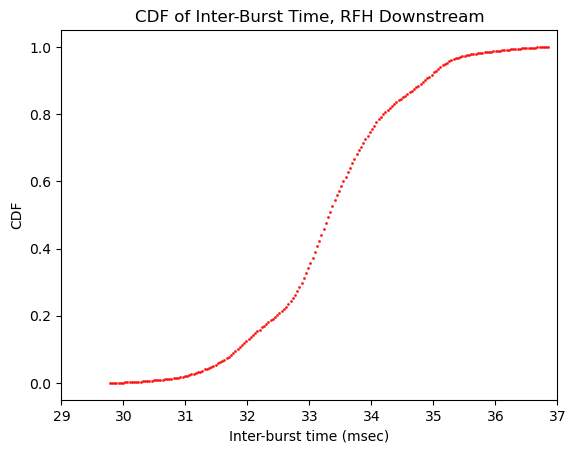

In [7]:
df_rfh_ds_ibt = pd.read_csv('rfh_ds_ibt_msec_cdf.csv', delimiter=";")

print(df_rfh_ds_ibt.head(10))

print(df_rfh_ds_ibt.tail(10))

lst_ibt_msec = df_rfh_ds_ibt.ibt.tolist()
lst_ibt_sec = [i/1000 for i in lst_ibt_msec]
lst_ibt_cdf = df_rfh_ds_ibt.cdf.tolist()

_, ax = plt.subplots()
ax.scatter(lst_ibt_msec, lst_ibt_cdf, s = 5, color = 'r', alpha = 0.75, marker='.')
ax.set_title("CDF of Inter-Burst Time, RFH Downstream")
ax.set_xlabel("Inter-burst time (msec)")
ax.set_ylabel("CDF")
x_xlim = [29, 37]
ax.set_xlim(x_xlim[0], x_xlim[1])    
# ax.set_xticks(np.arange(x_xlim[0], x_xlim[1], np.round_((x_xlim[1]-x_xlim[0])/10)))  

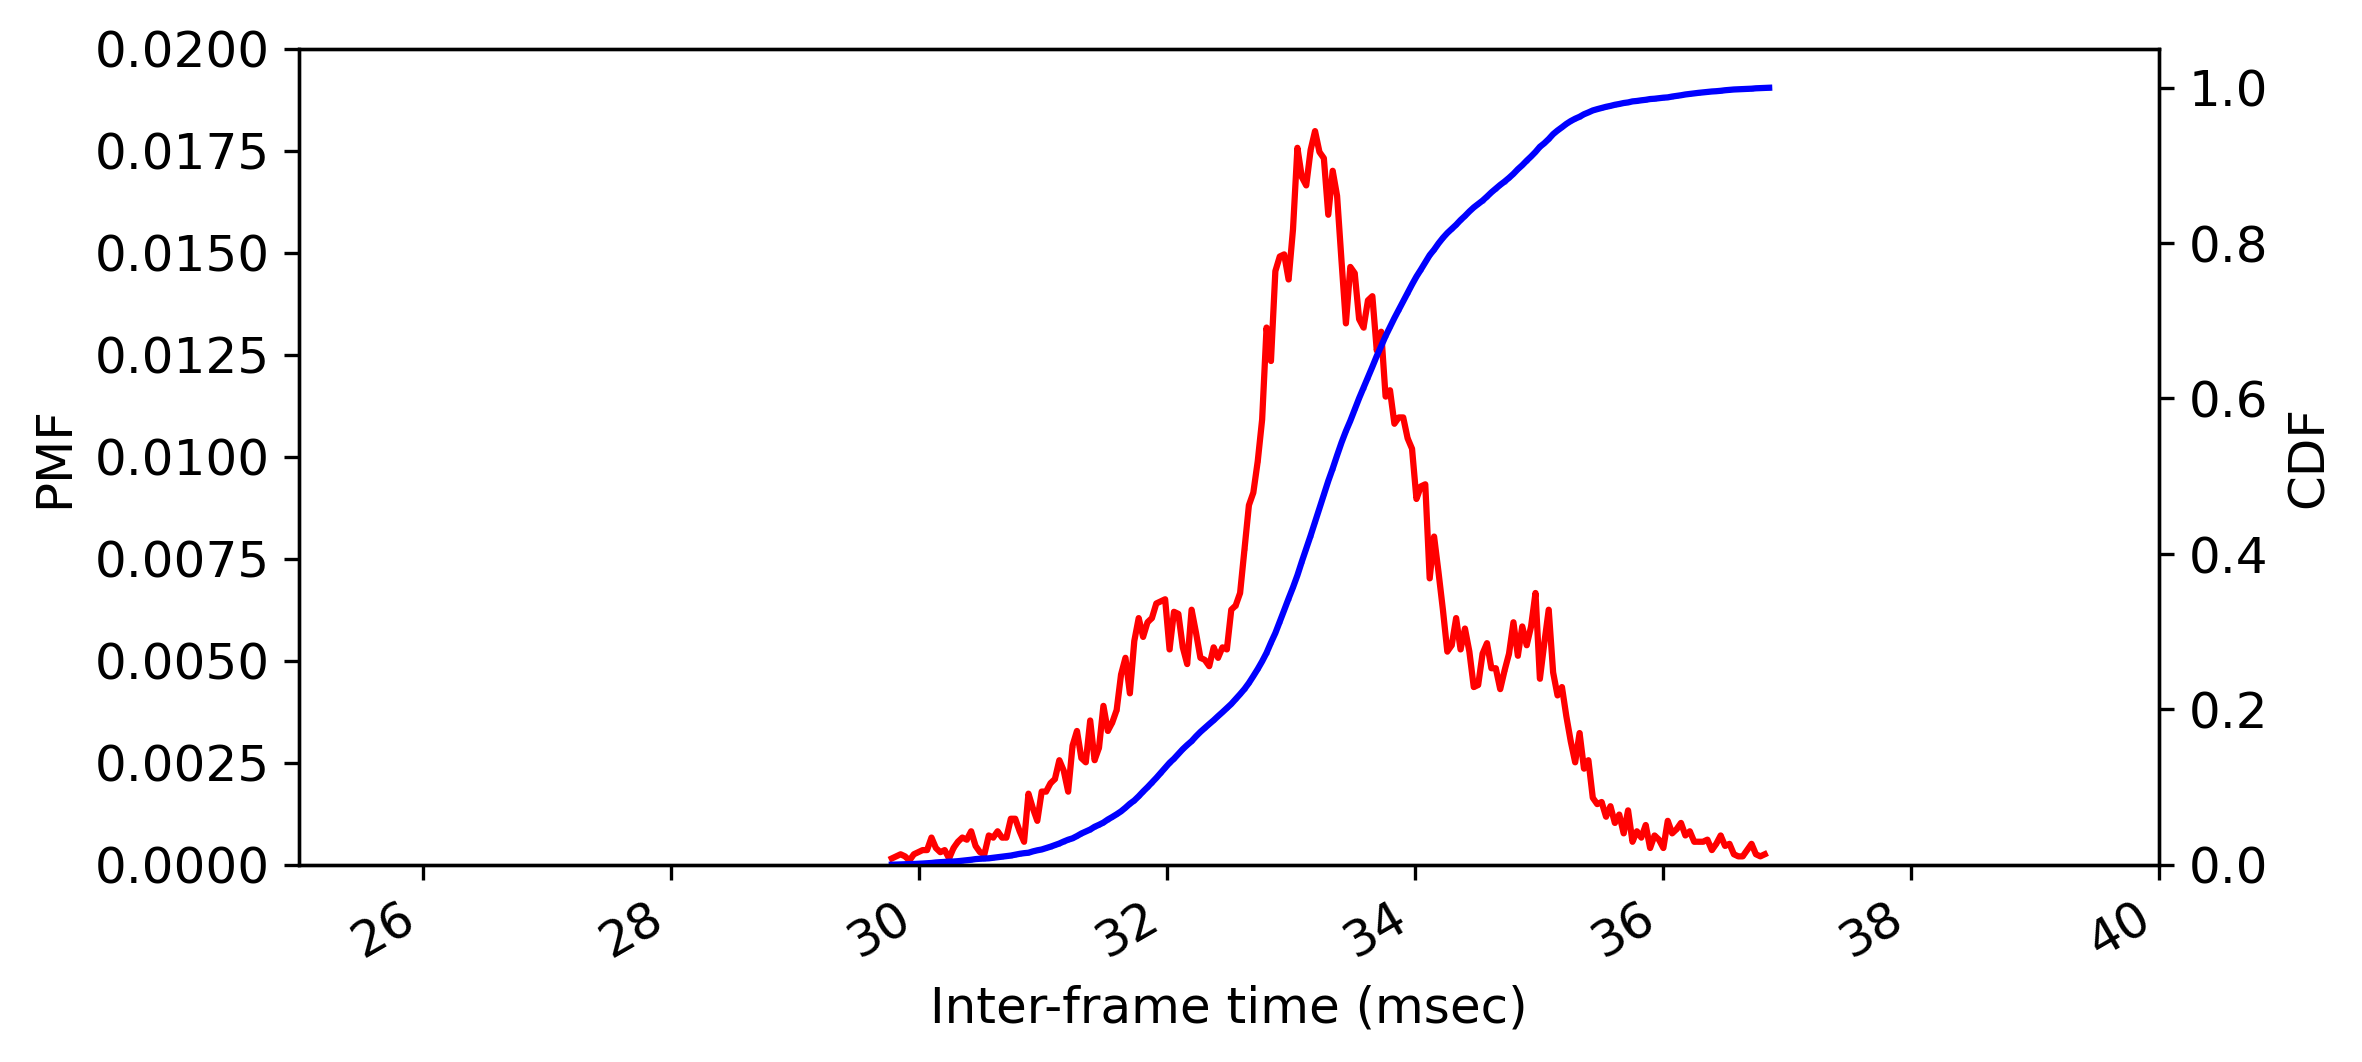

In [10]:
## Plot the PMF and CDF in one plot and show the results in msec
## Ref: https://python-graph-gallery.com/line-chart-dual-y-axis-with-matplotlib/

import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300

## 0. Get the msec version data


## 1. Obtain CDF of the IFT in msec


# 2. Plot two cures in one plot with their own y axis

fig, ax1 = plt.subplots(figsize=(8, 4))
ax2 = ax1.twinx()


# Plot PMF

lst_ibt_pmf = [lst_ibt_cdf[i+1]-lst_ibt_cdf[i] for i in range(len(lst_ibt_cdf)-1)]
ax1.plot(lst_ibt_msec[:-1], lst_ibt_pmf, marker='.', markersize=0.1, color='r', alpha=1)
ax1.set_ylabel("CDF", color='k', fontsize=20)
# num_bins = 50

# ### PMF-like Y axix, ref: https://stackoverflow.com/questions/38650550/cant-get-y-axis-on-matplotlib-histogram-to-display-probabilities
# n, bins, patches = ax1.hist(lst_ibt_msec, num_bins,
#                            range=[28, 40],
# #                             histtype='step',
#                             weights=np.ones_like(lst_ibt_msec) / len(lst_ibt_msec),
#                             density = False,
#                             color ='green',
#                             alpha = 0.5)

text_size = 12
ax1.set_xlabel("Inter-frame time (msec)", fontsize = text_size)
ax1.set_ylabel("PMF", color='k', fontsize=text_size)
ax1.tick_params(axis='y', labelsize=text_size)
ax1.tick_params(axis='x', labelsize=text_size)
ax1.set_ylim([0, 0.02])
# ax1.tick_params(axis="y", labelcolor=COLOR_TEMPERATURE)

# Plot CDF
ax2.plot(lst_ibt_msec, lst_ibt_cdf, marker='.', markersize=0.1, color='b', alpha=1)
ax2.set_ylabel("CDF", color='k', fontsize=text_size)
# ax2.tick_params(axis="y", labelcolor=COLOR_PRICE)
ax2.set_ylim([0, 1.05])
ax2.set_xlim([25, 40])
ax2.tick_params(axis='y', labelsize=text_size)

# fig.suptitle("Temperature down, price up", fontsize=20)
fig.autofmt_xdate()

### 3.1.2. State-Specific Burst Size

The burst size distribution is characterized for each application state. 

   app_state  burst_size       cdf
0          1    2716.000  0.001145
1          1    2746.005  0.002291
2          1    2776.010  0.002291
3          1    2806.015  0.003436
4          1    2836.020  0.004582
5          1    2866.025  0.004582
6          1    2896.030  0.004582
7          1    2926.035  0.004582
8          1    2956.040  0.008018
9          1    2986.045  0.008018
      app_state  burst_size       cdf
1390          7     4368.10  0.997700
1391          7     4386.49  0.998467
1392          7     4404.88  0.998467
1393          7     4423.27  0.998467
1394          7     4441.66  0.998467
1395          7     4460.05  0.998467
1396          7     4478.44  0.998467
1397          7     4496.83  0.998850
1398          7     4515.22  0.998850
1399          7     4533.61  0.999233


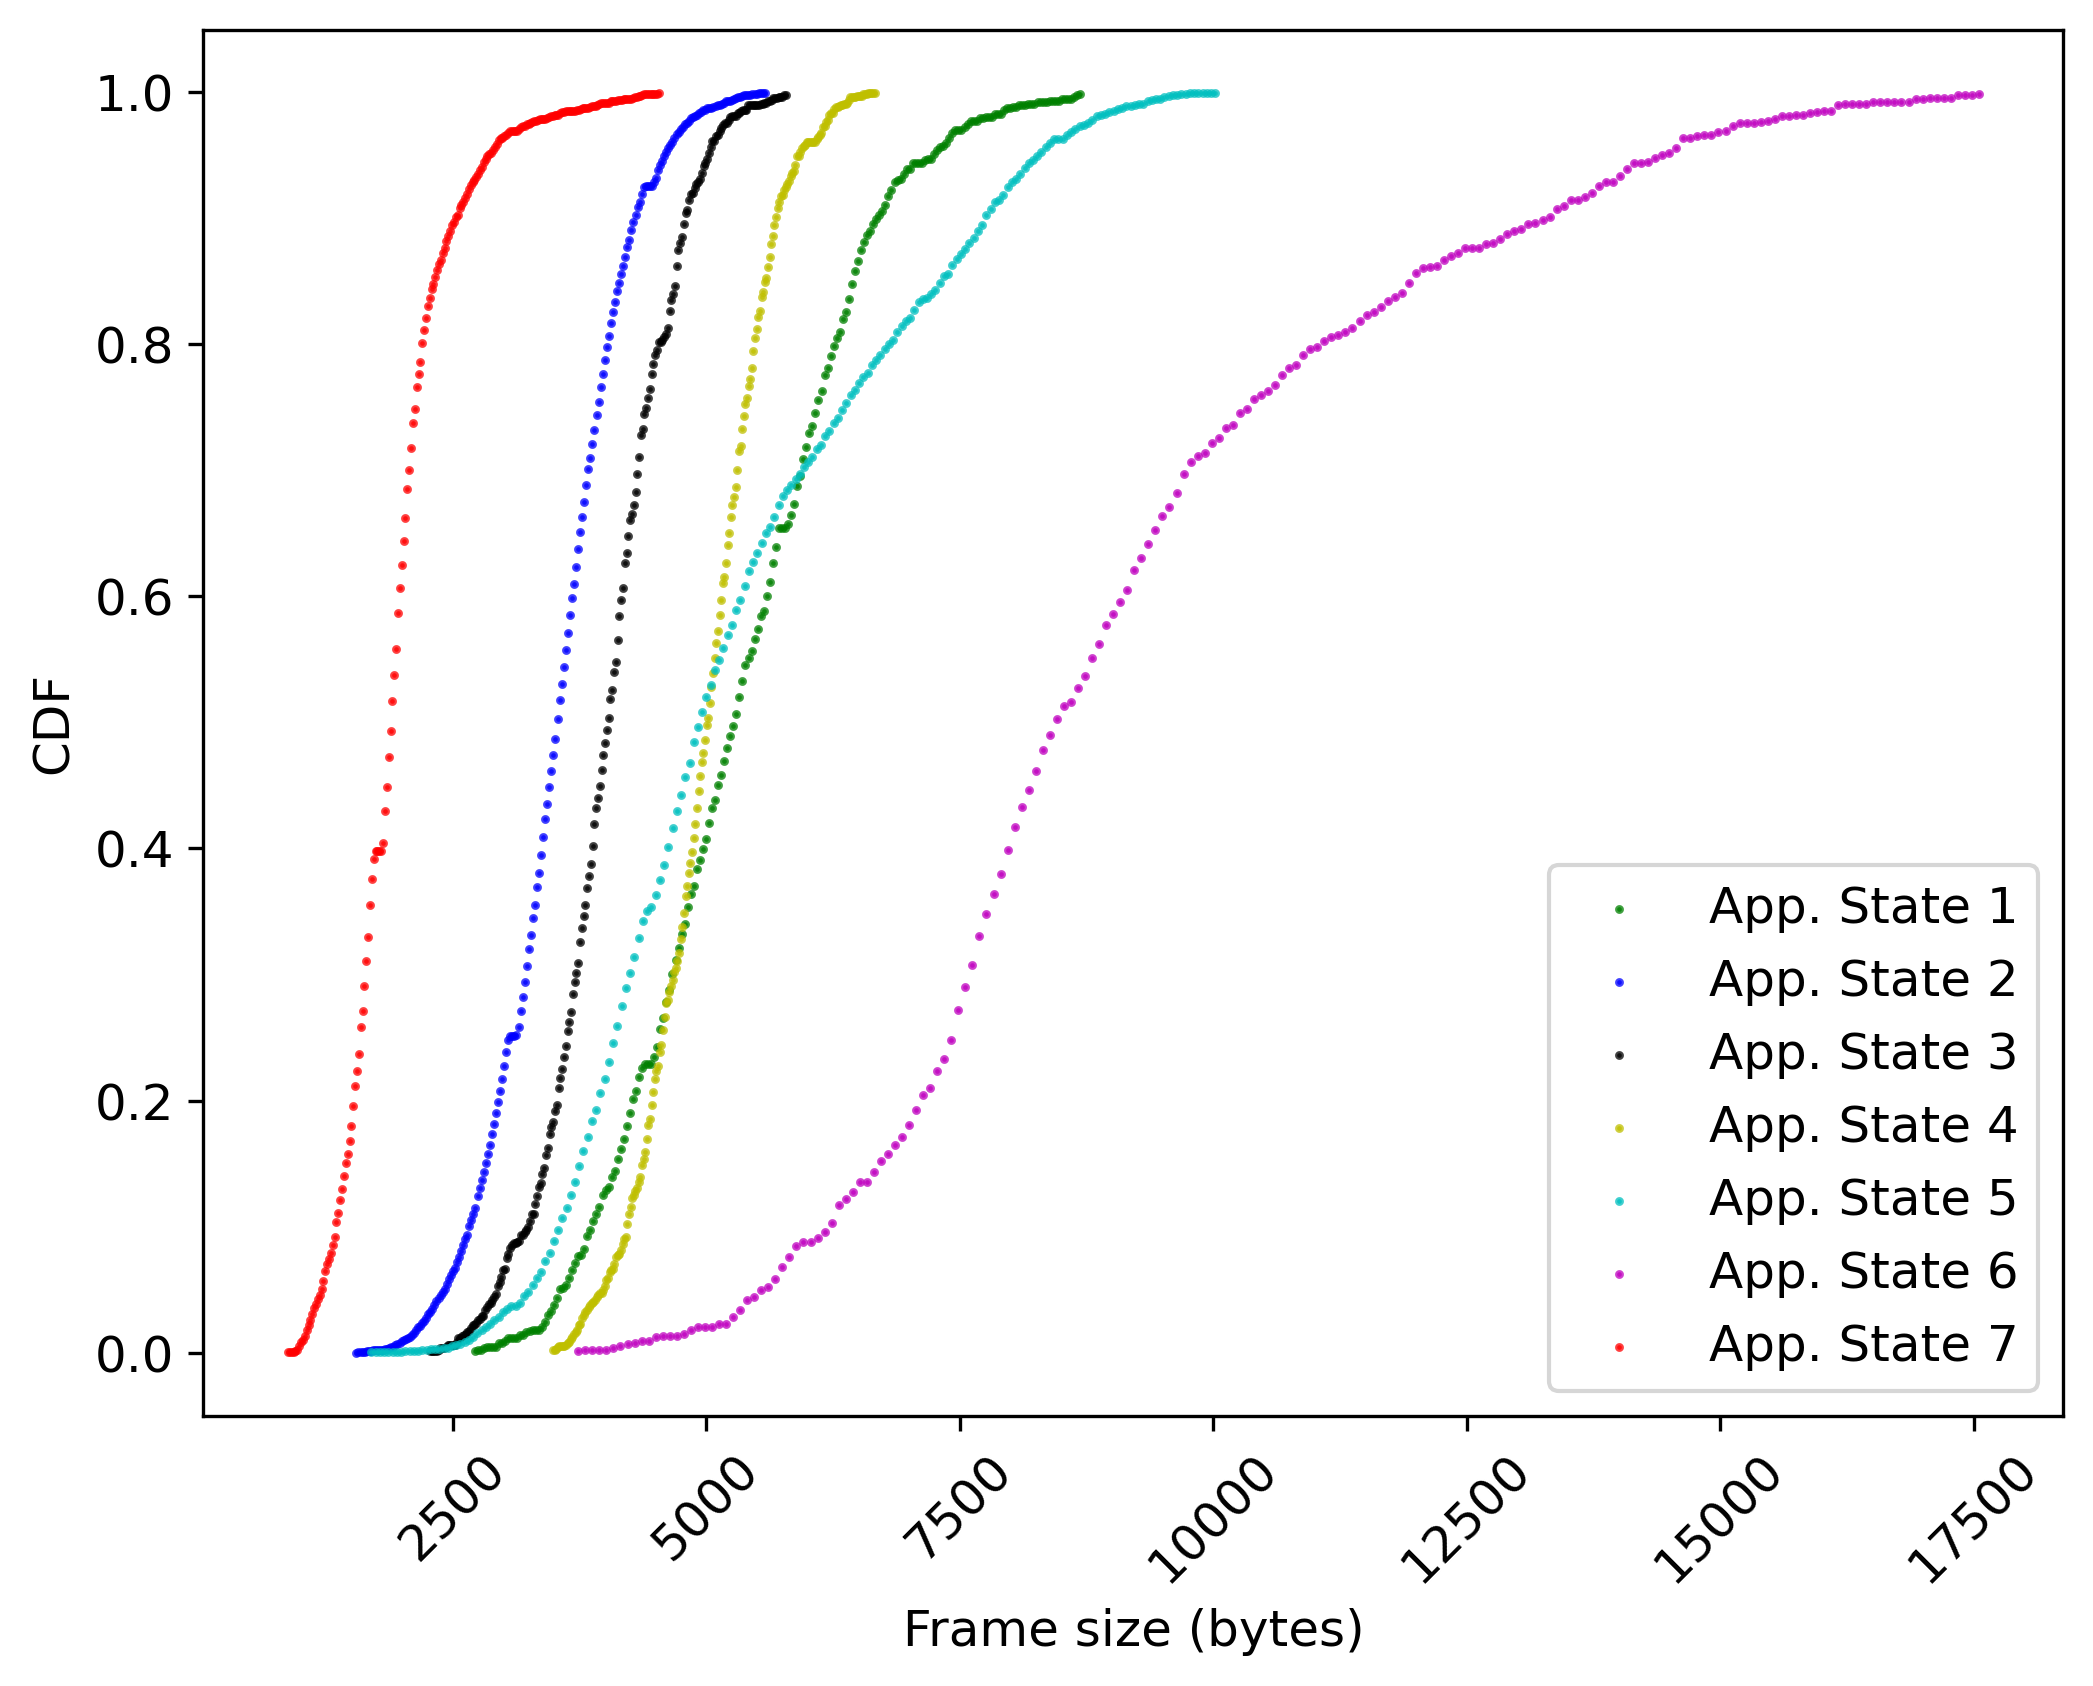

In [12]:
df_rfh_ds_burst_size = pd.read_csv('rfh_ds_burst_size_cdf.csv', delimiter=";")

print(df_rfh_ds_burst_size.head(10))

print(df_rfh_ds_burst_size.tail(10))


list_of_lst_burst_size = []


groups = df_rfh_ds_burst_size.groupby('app_state')

# groups

_, ax = plt.subplots(figsize=(8, 6))
color_vec = ['w', 'g', 'b', 'k', 'y', 'c', 'm', 'r']
for app_state, group in groups:
#     print(app_state)    
    list_of_lst_burst_size.append(group.burst_size)
    
    ax.scatter(group.burst_size, group.cdf, s = 5, color = color_vec[app_state], alpha = 0.75, marker='.', label="App. State "+str(app_state))
    
# ax.set_title("CDF of Burst Size, RFH Downstream")
ax.set_xlabel("Frame size (bytes)", fontsize=text_size)
ax.set_ylabel("CDF", fontsize=text_size)
ax.tick_params(axis='y', labelsize=text_size)
ax.tick_params(axis='x', labelsize=text_size, rotation=45)
ax.legend(fontsize=text_size)

### 3.1.3. Implementation Example in Python

We see that the traffic is varying with the application state on action. In a simulated use period, the application state switch from one to another given the preknown procedure model that depicts the length of each application state duration and the transition probability from the current application state to the next, which is out of scope of this report. To demonstrate how to use the obtained burst-wise traffic model, we assume that the simulated traffic comes from one single application state, e.g., No. 2.



C:\Users\Yongkang.Liu\AppData\Local\Temp\1\ipykernel_12368\1805135052.py:33: DeprecationWarning: `round_` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `round` instead.
  burst_time_next = frame_next_time_gen_dl(burst_time_curr, lst_ibt_probs, lst_ibt_vals)
C:\Users\Yongkang.Liu\AppData\Local\Temp\1\ipykernel_12368\1805135052.py:47: DeprecationWarning: `round_` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `round` instead.
  burst_time_next = frame_next_time_gen_dl(burst_time_curr, lst_ibt_probs, lst_ibt_vals)


Sim data size:  8979


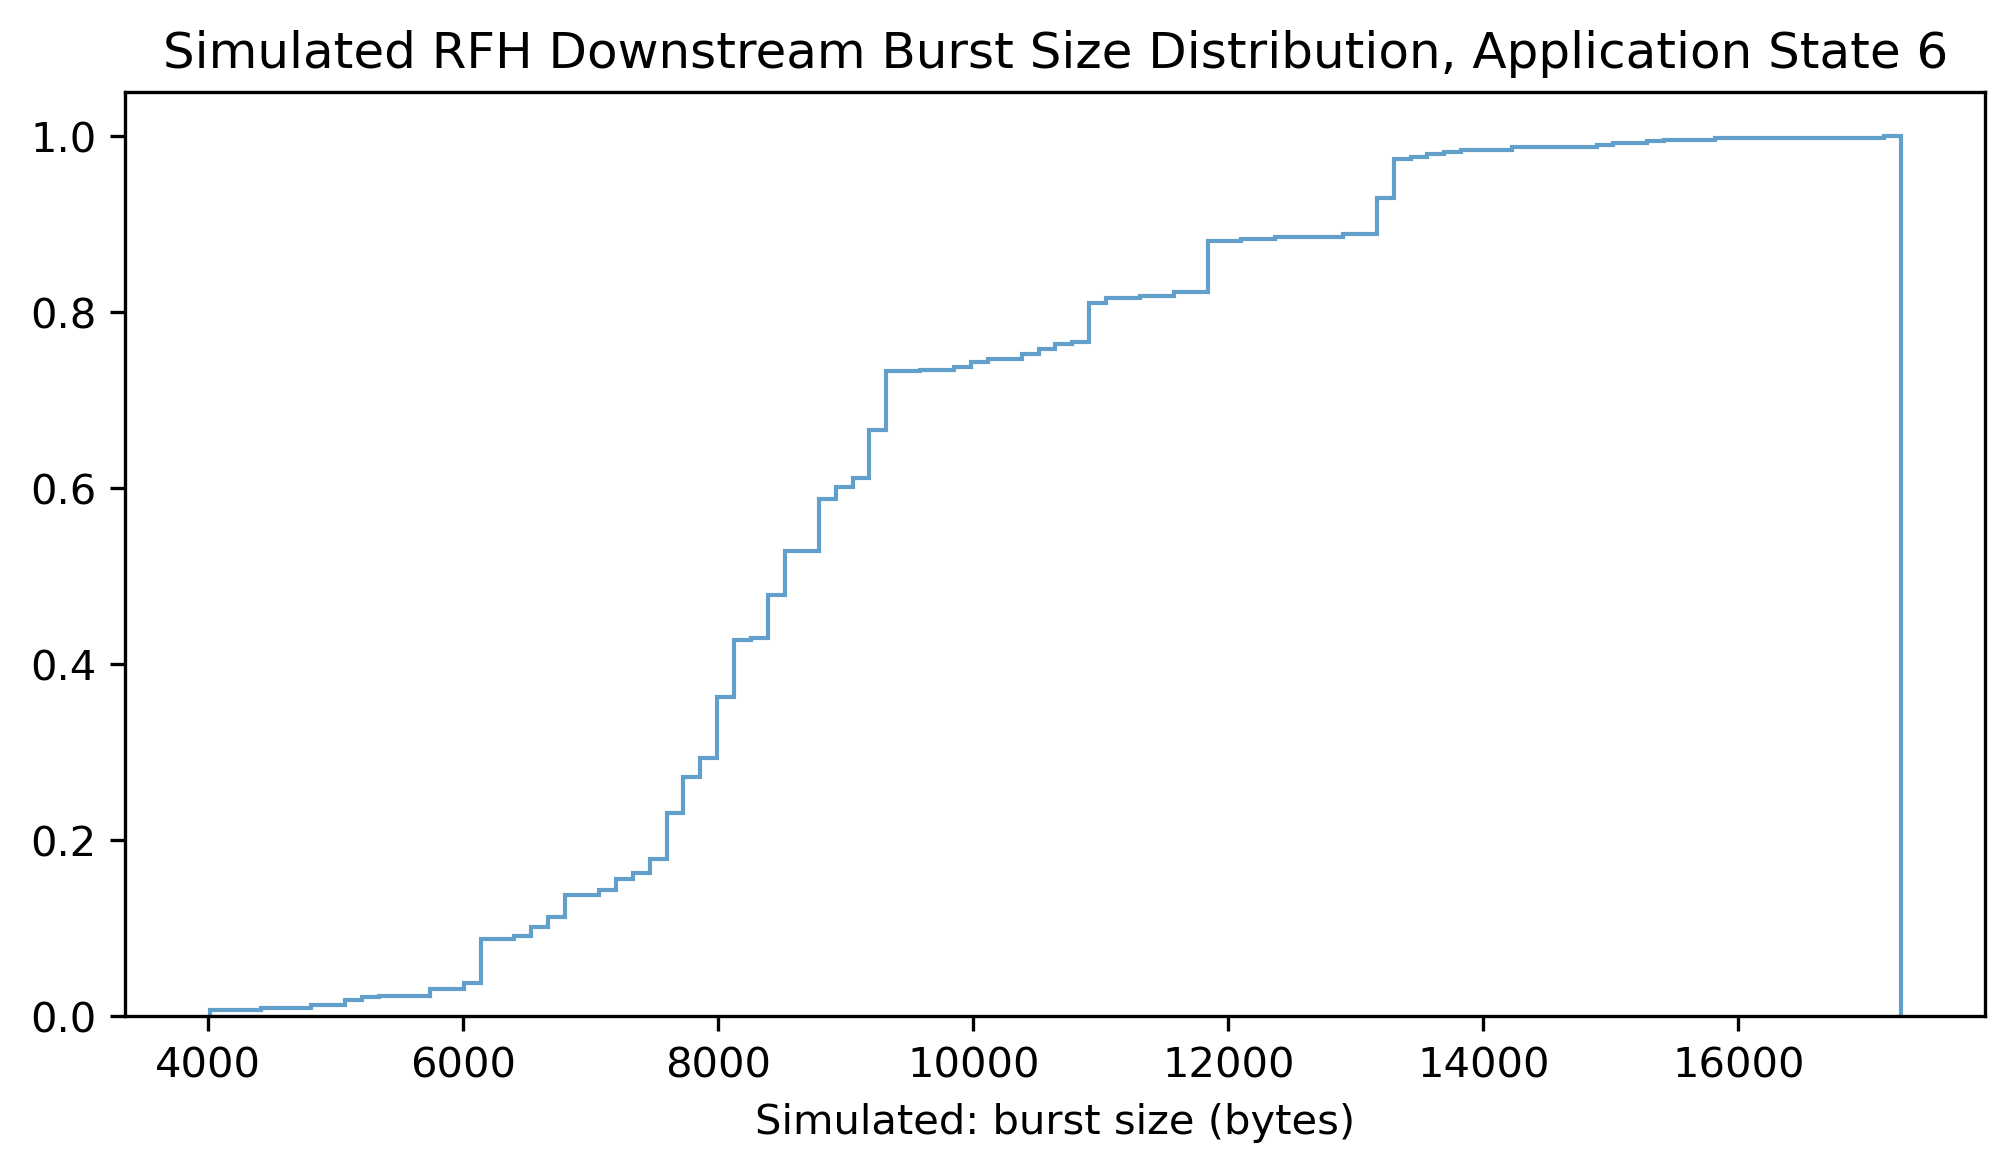

(0.0, 301.90000000000003)

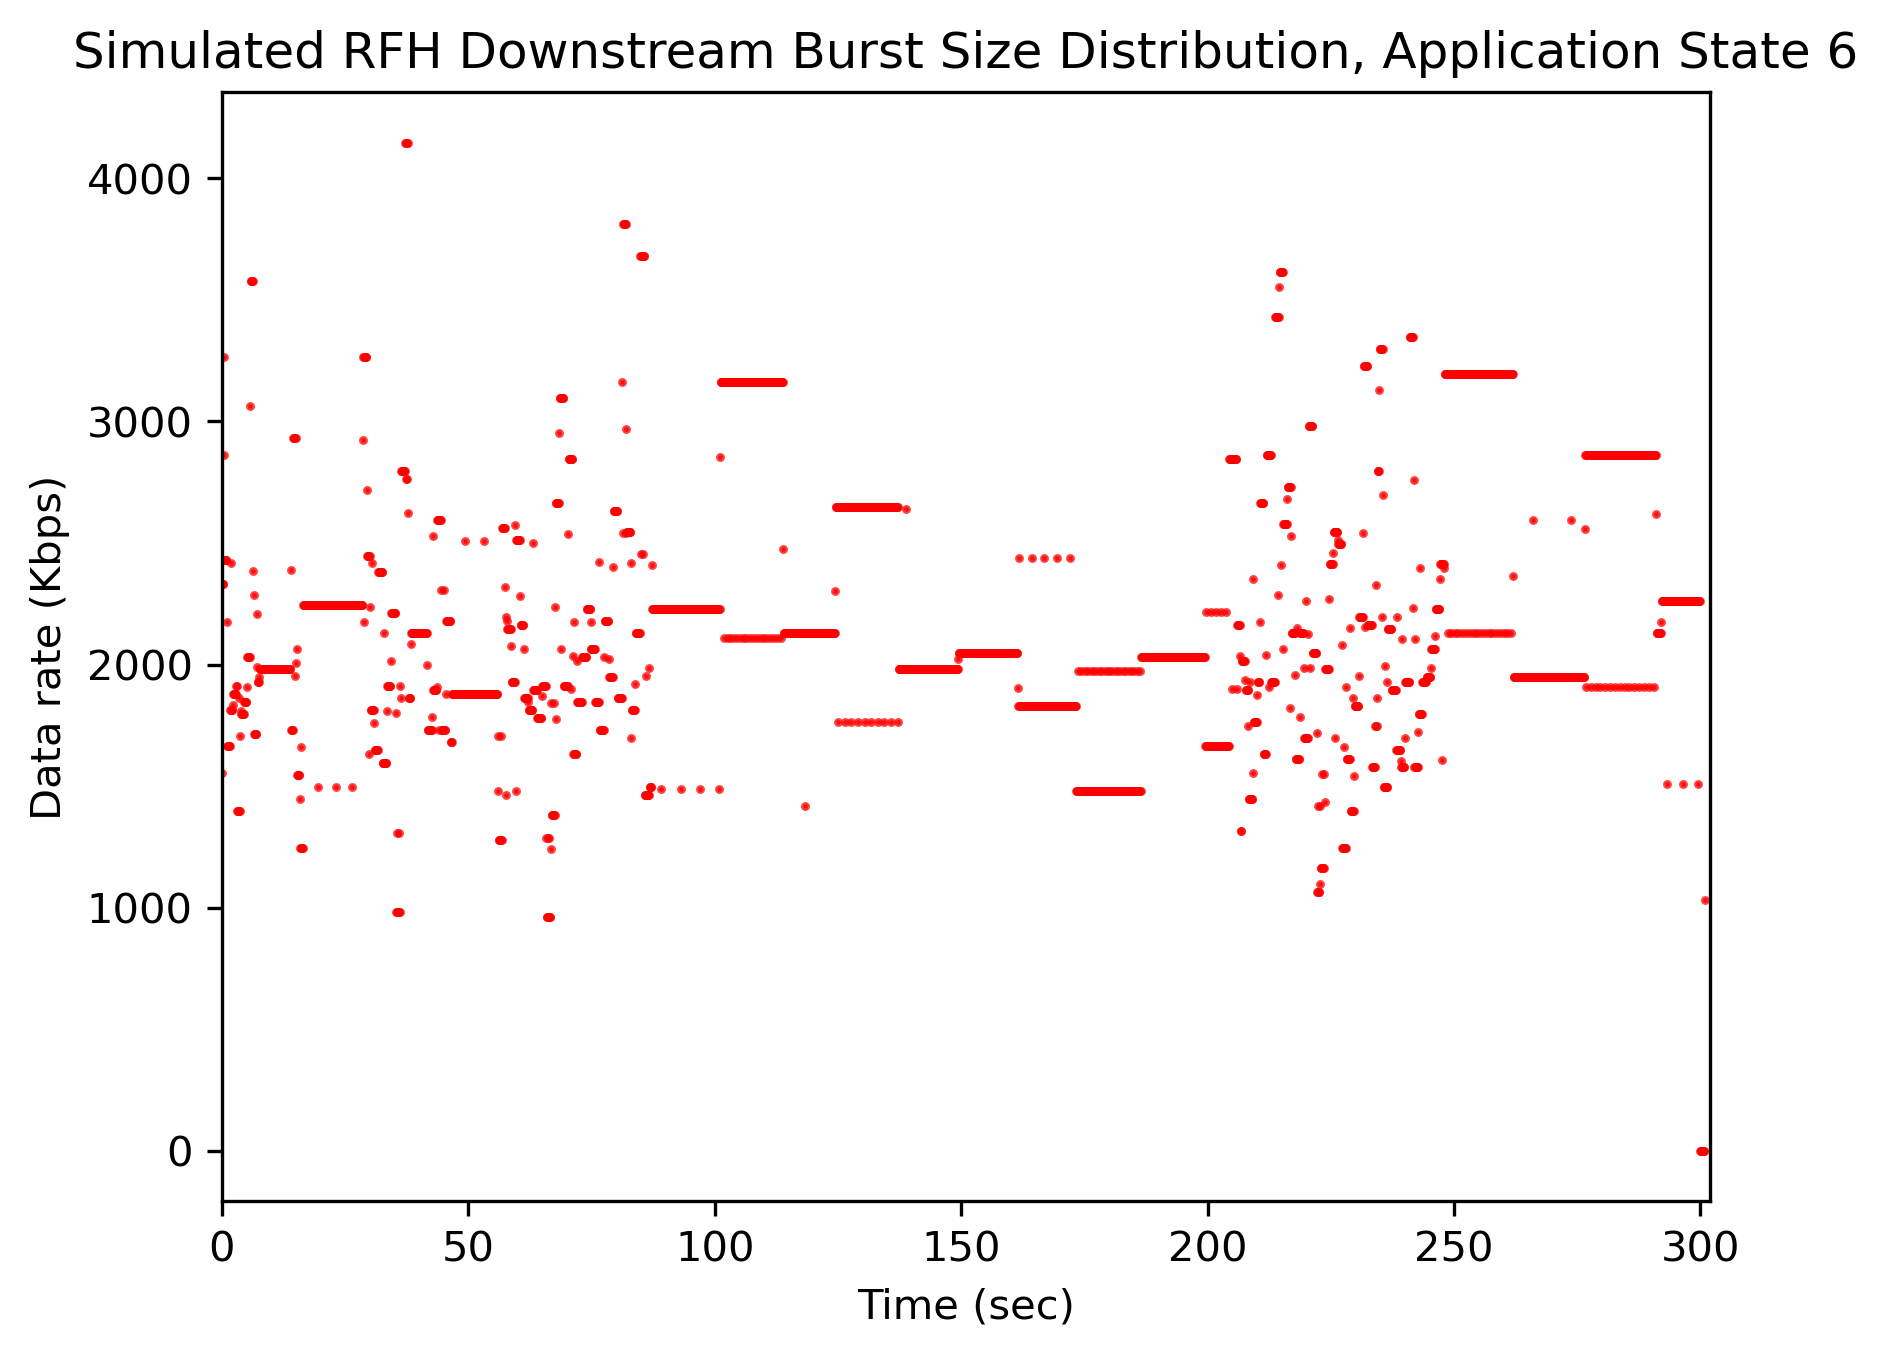

In [13]:
## Simulate the DS traffic at a specific Application State

# pick the app state
sim_app_state = 6

df_rfh_ds_burst_size_selected = df_rfh_ds_burst_size[df_rfh_ds_burst_size.app_state==sim_app_state]

sim_mat = [] # store the simulated frame size and time instances per the distribution of the samples

## Obtain Burst size CDF lists
lst_burst_size_vals = df_rfh_ds_burst_size_selected.burst_size.tolist()
lst_burst_size_probs = df_rfh_ds_burst_size_selected.cdf.tolist()

## Obtain IBT CDF lists
lst_ibt_vals = lst_ibt_sec
lst_ibt_probs = lst_ibt_cdf

# Step 1. Determine the initial burst size
# Generate a random number, and pick the initial burst size according to the ECDF distribution

# print("Step 1: Initial frame size")
burst_size_curr_idx = rand_index_gen(lst_burst_size_probs)
burst_size_curr = lst_burst_size_vals[burst_size_curr_idx]
# print("Initial frame size is ", burst_size_curr)

burst_time_curr = 0

# Save the first generated burst info
sim_mat.append([burst_time_curr, burst_size_curr])

# Create the following bursts
# Determine the interval length from the current burst to the next one 
burst_time_next = frame_next_time_gen_dl(burst_time_curr, lst_ibt_probs, lst_ibt_vals)

# Alternatively, can use the fixed ibt of the value 33.33 msec
# burst_time_next = burst_time_curr + 0.033 
# print("Current time: {}, Next time: {}".format(burst_time_curr, burst_time_next))

sim_time_stop = 300 # simulated traffic time

while burst_time_curr <= sim_time_stop:
    sim_mat.append([burst_time_curr, burst_size_curr])
  
    burst_size_curr = lst_burst_size_vals[rand_index_gen(lst_burst_size_probs)]
    
    burst_time_curr = burst_time_next
    burst_time_next = frame_next_time_gen_dl(burst_time_curr, lst_ibt_probs, lst_ibt_vals)
#     burst_time_next = burst_time_curr + 0.0333
    
    
print('Sim data size: ', len(sim_mat))


# Plot the burst size distribution in the simulated data set

lst_sim_size = [i[1] for i in sim_mat]

fig, ax = plt.subplots(figsize=(8, 4))

num_bins = 100

# plot the histogram
n, bins, patches = ax.hist(lst_sim_size, num_bins, 
                            density = 1, histtype='step', 
                           cumulative=True,
                            alpha = 0.7)

plt.title("Simulated RFH Downstream Burst Size Distribution, Application State " + str(sim_app_state))
plt.xlabel('Simulated: burst size (bytes)')
# plt.legend(loc='lower right') 
plt.show()


import math

step = .1 #sec

start_time = 0
end_time = math.ceil(sim_mat[-1][0]) + 1
arr_time = np.arange(start_time, end_time, step = step)
arr_time[1]

    
lst_byte = [0 for i in range(len(arr_time))]


import math

for i in sim_mat:
    len_tmp = i[1]#int(i[cols["data.len"]])
    time_tmp = i[0]#i[cols["frame.time_epoch"]]
    idx = math.ceil(time_tmp / step)
    lst_byte[idx-1] += len_tmp


lst_rate_kbps = [i * 8 / step / 1000 for i in lst_byte]

lst_rate_kbps_sim = []
for i in lst_rate_kbps:
    lst_rate_kbps_sim.append(i)

# print(lst_rate_kbps[:10])

_, ax = plt.subplots()
ax.scatter(arr_time, lst_rate_kbps, s = 5, color = 'r', alpha = 0.75, marker='.')
ax.set_title("Simulated RFH Downstream Burst Size Distribution, Application State " + str(sim_app_state))
ax.set_xlabel("Time (sec)")
ax.set_ylabel("Data rate (Kbps)")
x_xlim = [0, arr_time[-1]+1]
ax.set_xlim(x_xlim[0], x_xlim[1])  
# ax.set_ylim(0, 30) 
# ax.set_xticks(np.arange(x_xlim[0], x_xlim[1], np.round_((x_xlim[1]-x_xlim[0])/10)))  

## 3.2. RFH Upstream 

Like the RFH Downstream case, the upstream traffic modeling follows the similar procedures.

### 3.1.1. Burst Timing

The IBT in the upstream can be characterized by an empirical distribution. The IBT indicates that the upstream virtual content update is approximately performed at 30 Hz.


         ibt       cdf
0  20.343065  0.000049
1  20.473015  0.000246
2  20.602965  0.000491
3  20.732915  0.000836
4  20.862865  0.001081
5  20.992815  0.001573
6  21.122766  0.002064
7  21.252716  0.002457
8  21.382666  0.002802
9  21.512616  0.003146
           ibt       cdf
190  45.033574  0.996215
191  45.163524  0.996658
192  45.293474  0.997002
193  45.423424  0.997543
194  45.553374  0.997788
195  45.683324  0.998034
196  45.813274  0.998526
197  45.943224  0.999115
198  46.073174  0.999459
199  46.203125  0.999558


Text(0, 0.5, 'CDF')

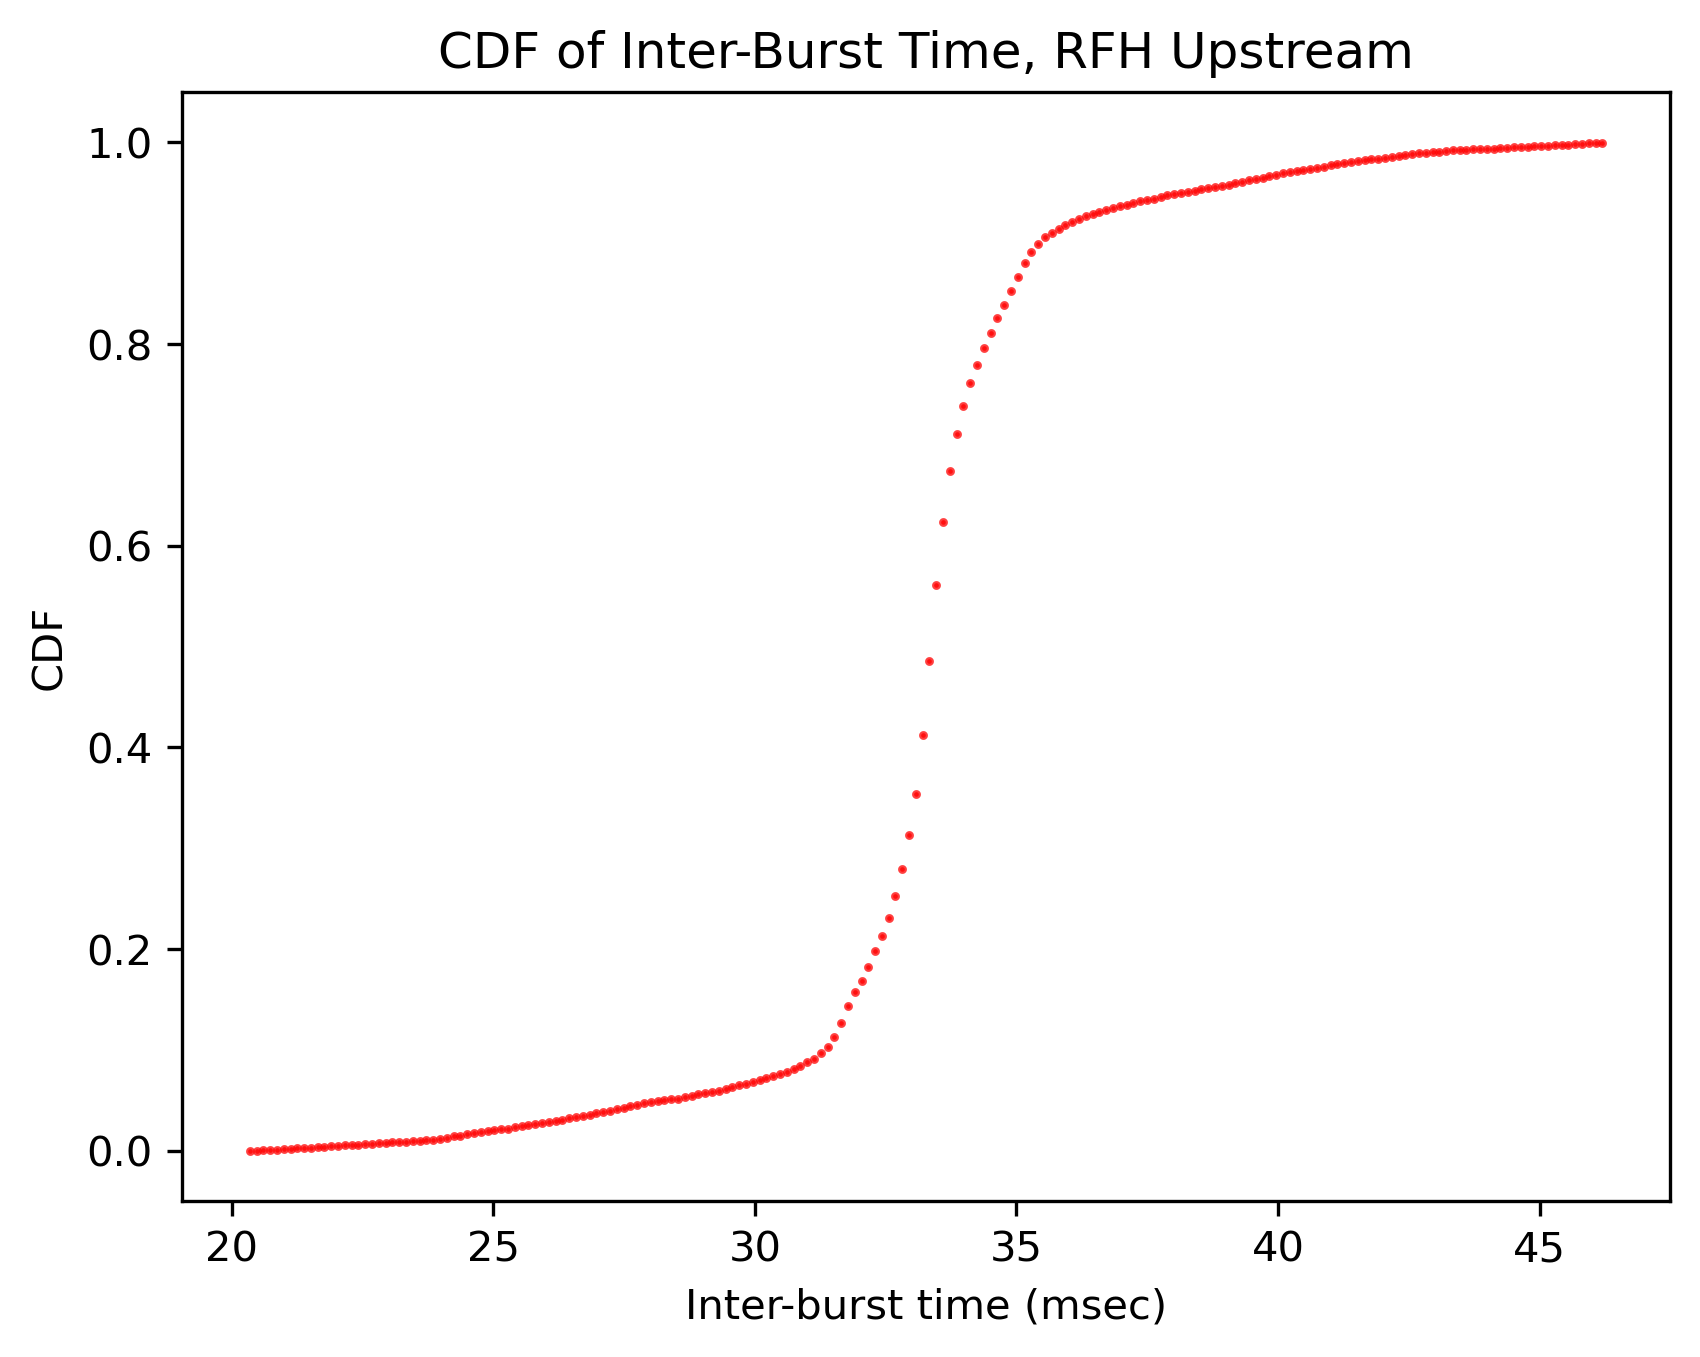

In [14]:
df_rfh_us_ibt = pd.read_csv('rfh_us_ibt_msec_cdf.csv', delimiter=";")

print(df_rfh_us_ibt.head(10))

print(df_rfh_us_ibt.tail(10))

lst_ibt_msec = df_rfh_us_ibt.ibt.tolist()
lst_ibt_sec = [i/1000 for i in lst_ibt_msec]
lst_ibt_cdf = df_rfh_us_ibt.cdf.tolist()

_, ax = plt.subplots()
ax.scatter(lst_ibt_msec, lst_ibt_cdf, s = 5, color = 'r', alpha = 0.75, marker='.')
ax.set_title("CDF of Inter-Burst Time, RFH Upstream")
ax.set_xlabel("Inter-burst time (msec)")
ax.set_ylabel("CDF")
#x_xlim = [29, 37]
#ax.set_xlim(x_xlim[0], x_xlim[1])    
# ax.set_xticks(np.arange(x_xlim[0], x_xlim[1], np.round_((x_xlim[1]-x_xlim[0])/10)))  

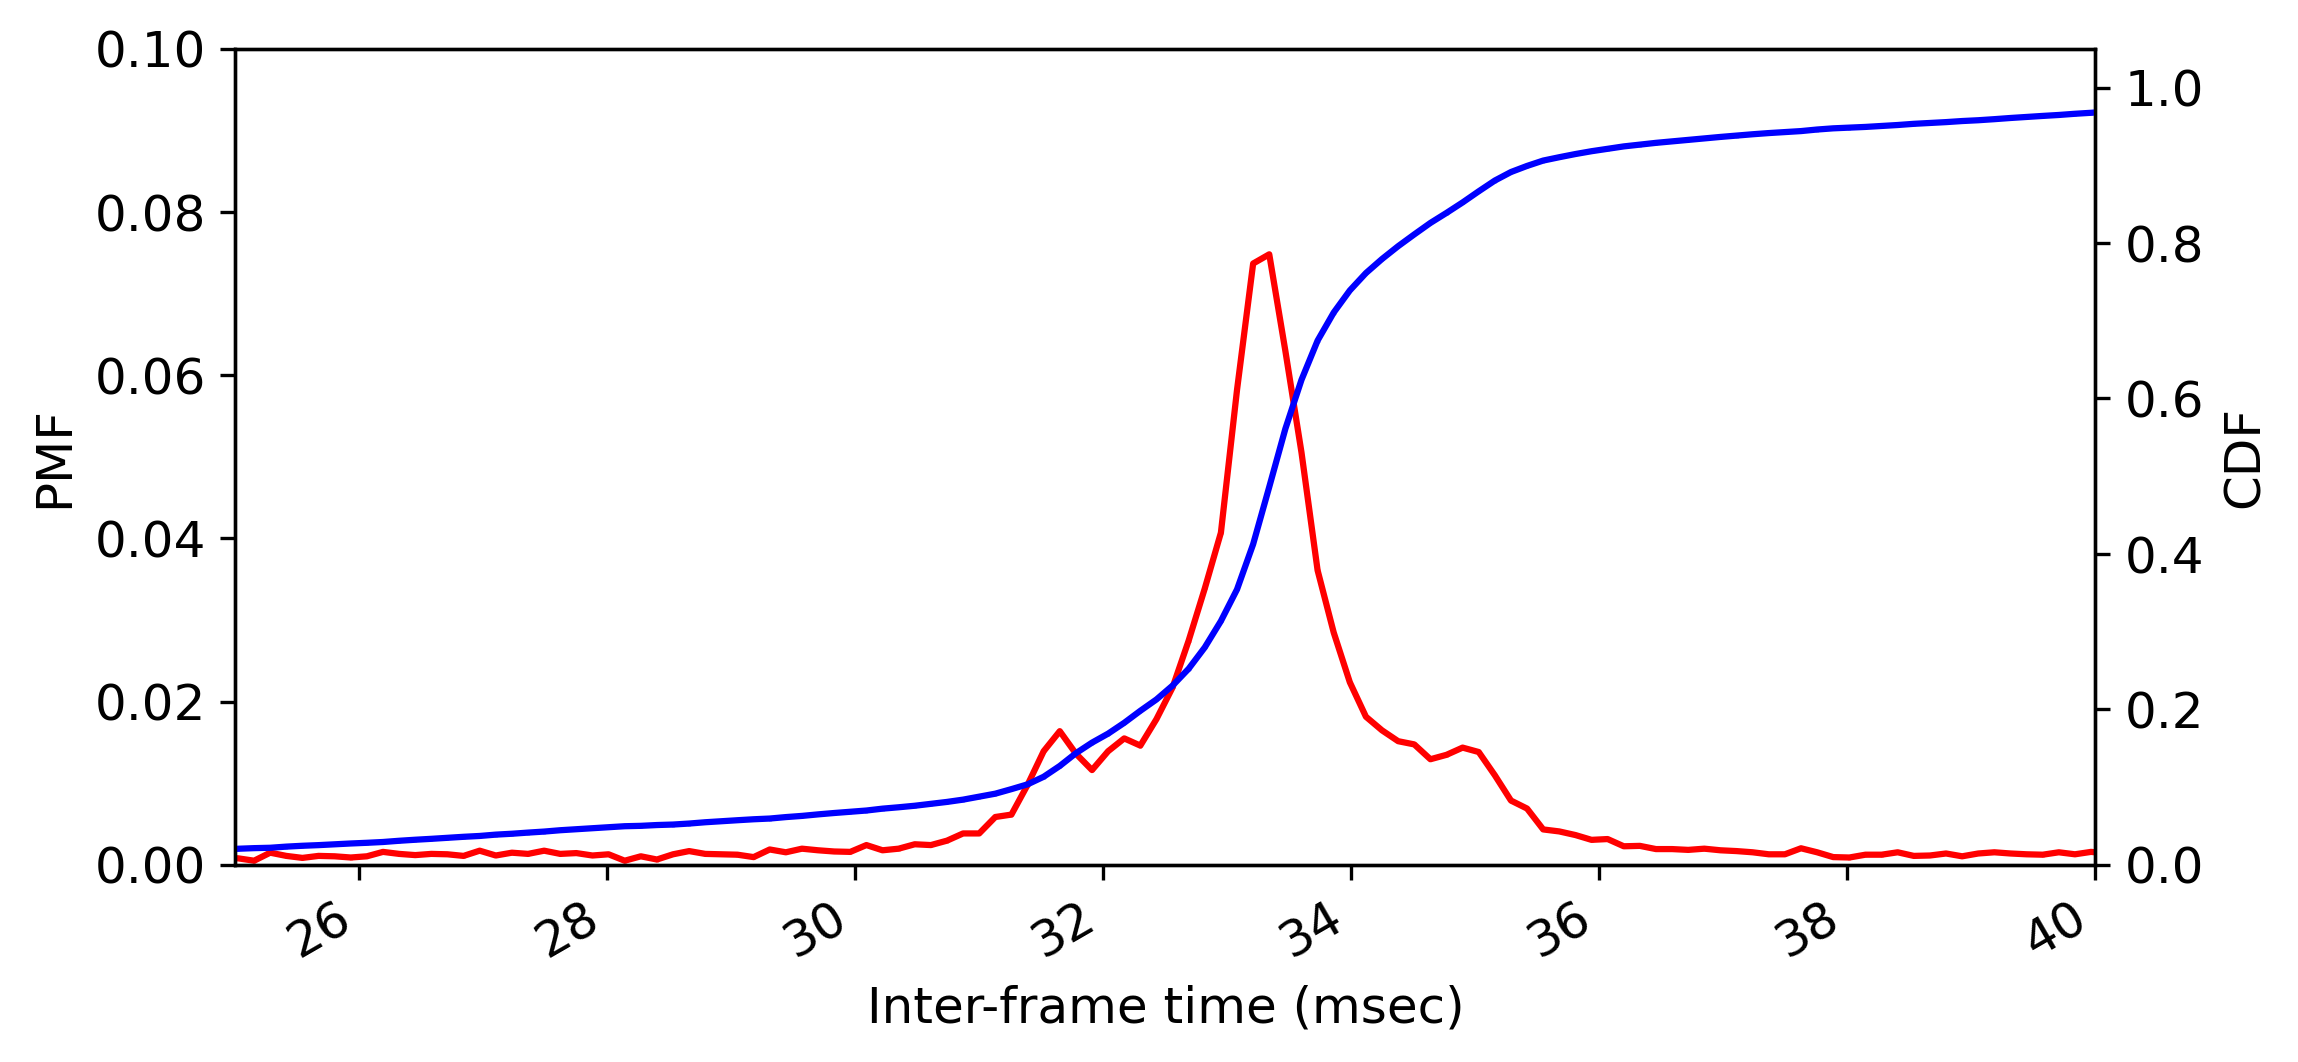

In [17]:
## Plot the PMF and CDF in one plot and show the results in msec
## Ref: https://python-graph-gallery.com/line-chart-dual-y-axis-with-matplotlib/

import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300

## 0. Get the msec version data


## 1. Obtain CDF of the IFT in msec


# 2. Plot two cures in one plot with their own y axis

fig, ax1 = plt.subplots(figsize=(8, 4))
ax2 = ax1.twinx()


# Plot PMF

lst_ibt_pmf = [lst_ibt_cdf[i+1]-lst_ibt_cdf[i] for i in range(len(lst_ibt_cdf)-1)]
ax1.plot(lst_ibt_msec[:-1], lst_ibt_pmf, marker='.', markersize=0.1, color='r', alpha=1)
ax1.set_ylabel("CDF", color='k', fontsize=20)
# num_bins = 50

# ### PMF-like Y axix, ref: https://stackoverflow.com/questions/38650550/cant-get-y-axis-on-matplotlib-histogram-to-display-probabilities
# n, bins, patches = ax1.hist(lst_ibt_msec, num_bins,
#                            range=[28, 40],
# #                             histtype='step',
#                             weights=np.ones_like(lst_ibt_msec) / len(lst_ibt_msec),
#                             density = False,
#                             color ='green',
#                             alpha = 0.5)

ax1.set_xlabel("Inter-frame time (msec)", fontsize = text_size)
ax1.set_ylabel("PMF", color='k', fontsize=text_size)
ax1.tick_params(axis='y', labelsize=text_size)
ax1.tick_params(axis='x', labelsize=text_size)
ax1.set_ylim([0, 0.1])
# ax1.tick_params(axis="y", labelcolor=COLOR_TEMPERATURE)

# Plot CDF
ax2.plot(lst_ibt_msec, lst_ibt_cdf, marker='.', markersize=0.1, color='b', alpha=1)
ax2.set_ylabel("CDF", color='k', fontsize=text_size)
# ax2.tick_params(axis="y", labelcolor=COLOR_PRICE)
ax2.set_ylim([0, 1.05])
ax2.set_xlim([25, 40])
ax2.tick_params(axis='y', labelsize=text_size)

# fig.suptitle("Temperature down, price up", fontsize=20)
fig.autofmt_xdate()

### 3.2.2. State-Specific Burst Size

The burst size distribution is characterized for each application state.

   app_state  burst_size       pmf
0          0         200  0.024943
1          0         250  0.010204
2          0         550  0.671202
3          0         600  0.001134
4          0        1000  0.005669
5          0        1050  0.283447
6          0        1100  0.001134
7          0        1500  0.002268
8          1         200  0.020362
9          1         250  0.022624
    app_state  burst_size       pmf
65          6        2450  0.168889
66          7          50  0.000370
67          7         200  0.040696
68          7         250  0.022198
69          7         550  0.594525
70          7         600  0.001480
71          7         900  0.001480
72          7        1000  0.012579
73          7        1050  0.325934
74          7        1500  0.000740


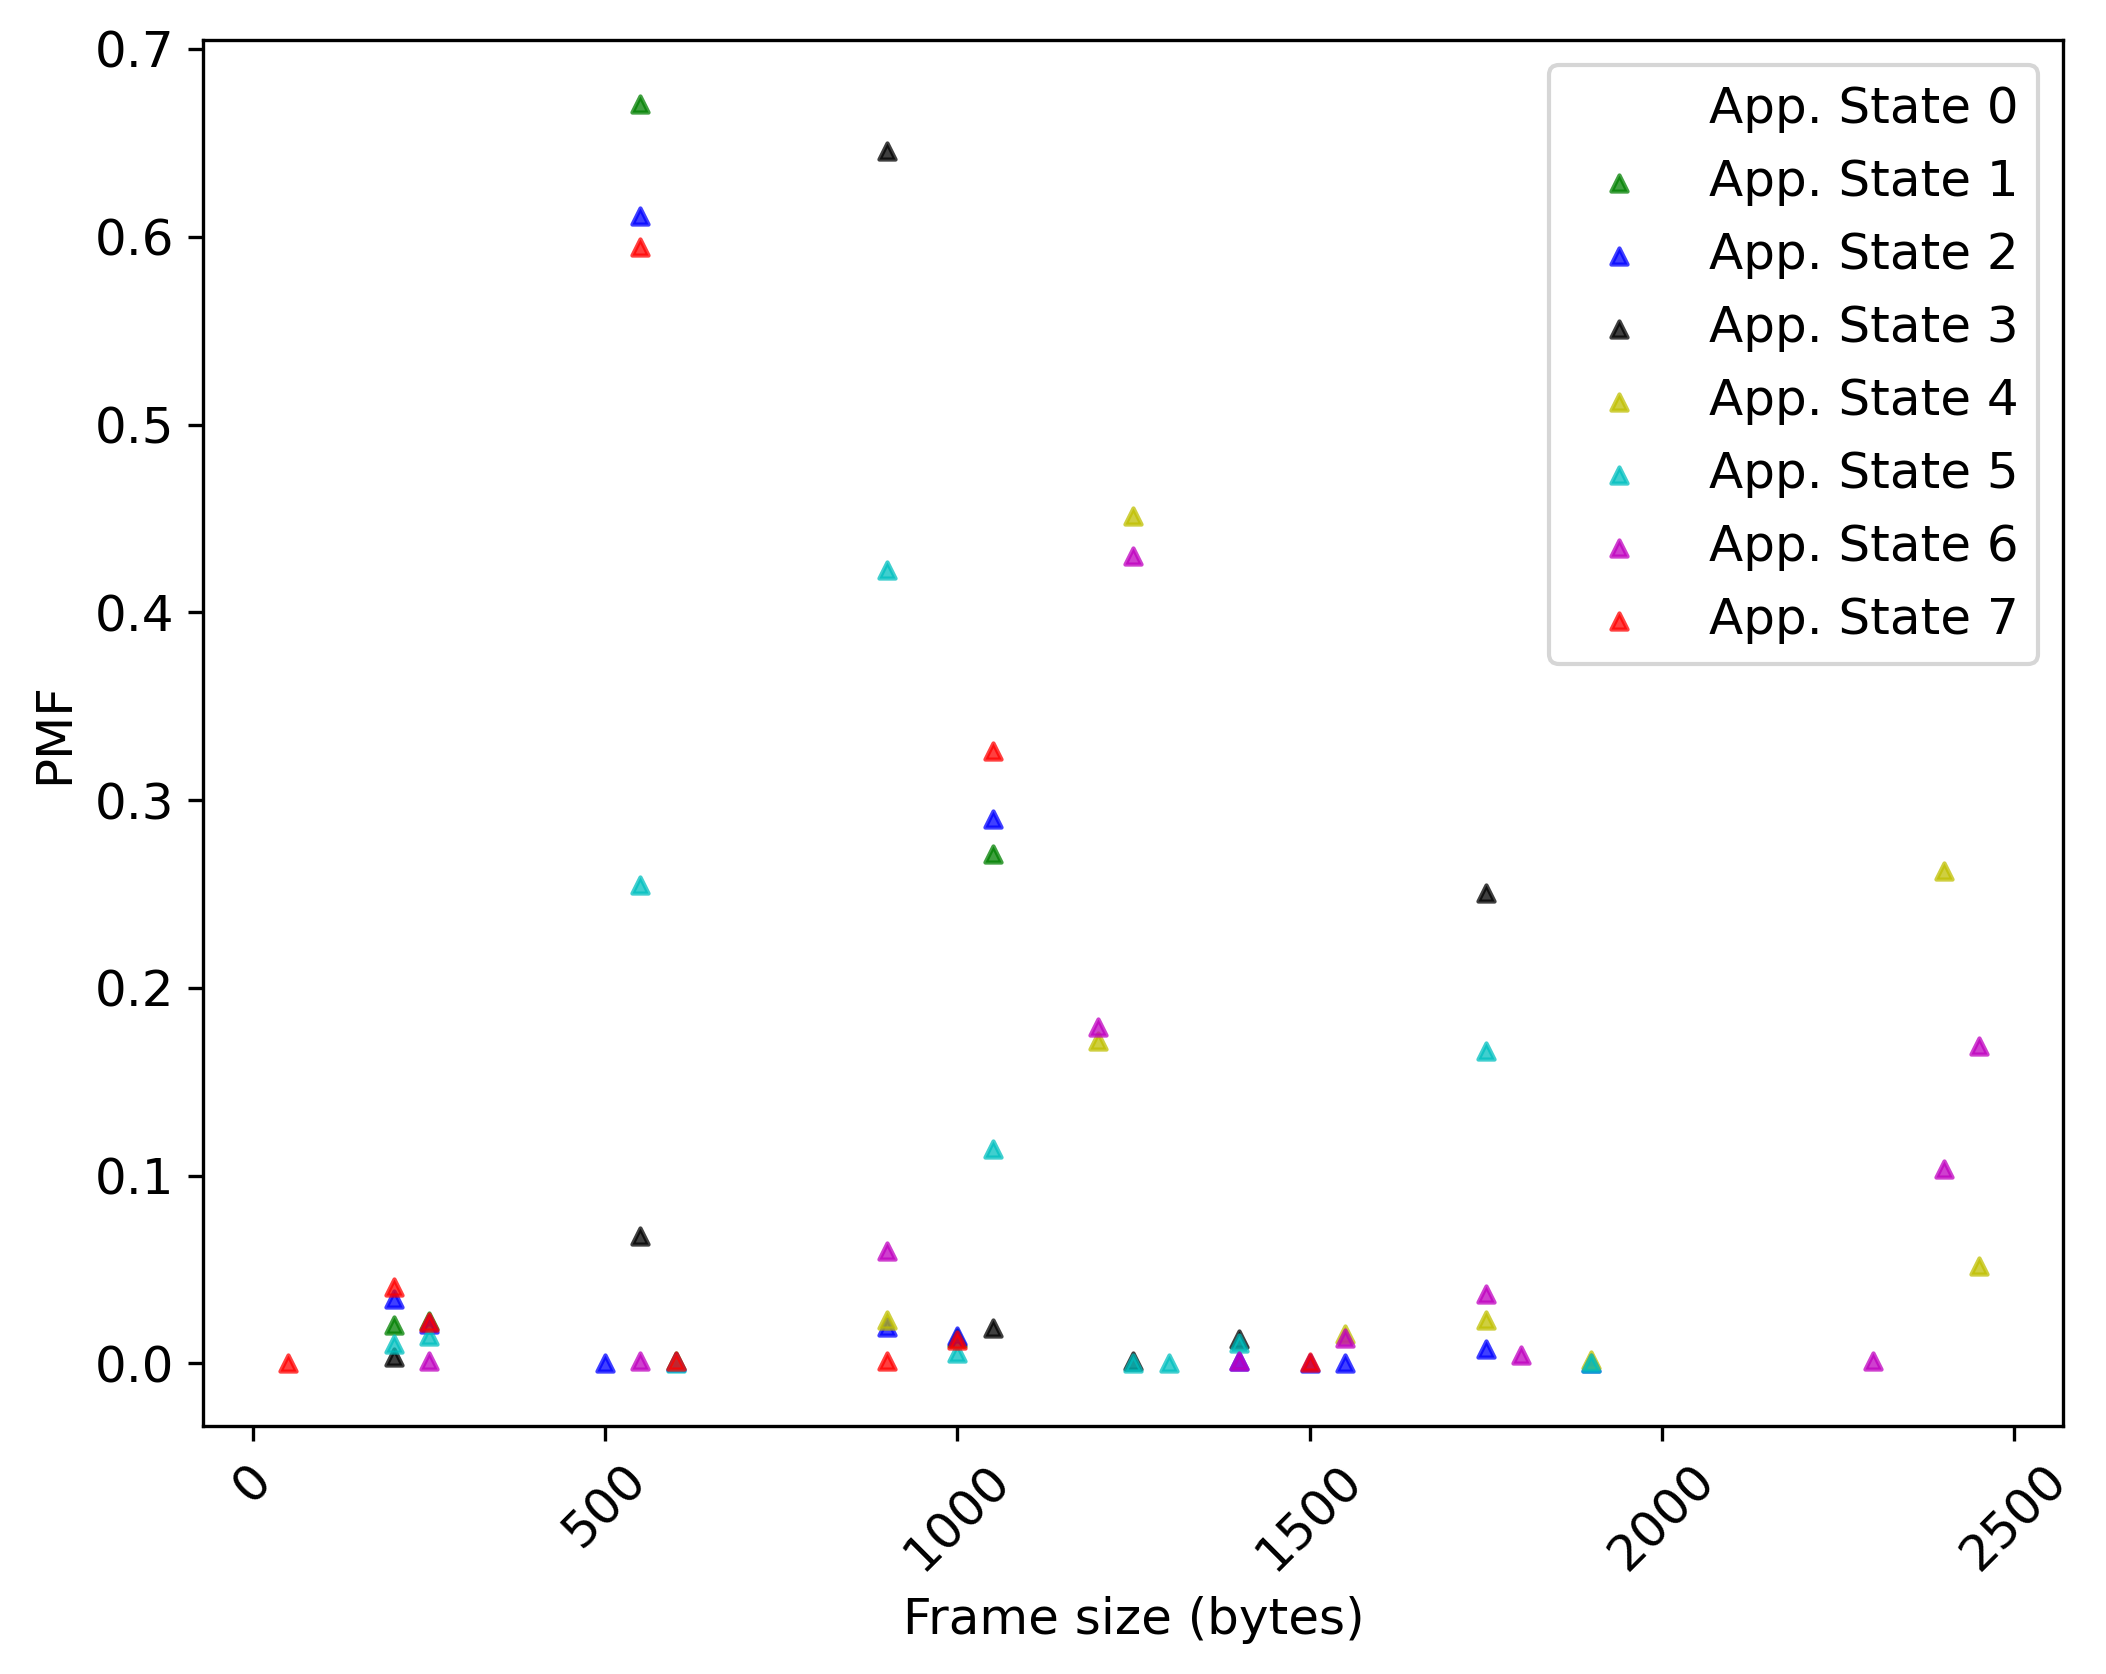

In [20]:
df_rfh_us_burst_size = pd.read_csv('rfh_us_burst_size_pmf.csv', delimiter=";")

print(df_rfh_us_burst_size.head(10))

print(df_rfh_us_burst_size.tail(10))


list_of_lst_burst_size = []


groups = df_rfh_us_burst_size.groupby('app_state')

# groups

_, ax = plt.subplots(figsize=(8, 6))
color_vec = ['w', 'g', 'b', 'k', 'y', 'c', 'm', 'r']
for app_state, group in groups:
#     print(app_state)    
    list_of_lst_burst_size.append(group.burst_size)
    
    ax.scatter(group.burst_size, group.pmf, s = 15, color = color_vec[app_state], alpha = 0.75, marker='^', label="App. State "+str(app_state))
    
# ax.set_title("CDF of Burst Size, RFH Downstream")
ax.set_xlabel("Frame size (bytes)", fontsize=text_size)
ax.set_ylabel("PMF", fontsize=text_size)
ax.tick_params(axis='y', labelsize=text_size)
ax.tick_params(axis='x', labelsize=text_size, rotation=45)
ax.legend(fontsize=text_size)

### 3.2.3. Implementation Example in Python

Similar to the implementation of RFH DS traffic model, we also demonstrate how to generate the US traffic within a single application state, e.g., Application State 6.

C:\Users\Yongkang.Liu\AppData\Local\Temp\1\ipykernel_20236\2067084631.py:38: DeprecationWarning: `round_` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `round` instead.
  burst_time_next = frame_next_time_gen_dl(burst_time_curr, lst_ibt_probs, lst_ibt_vals)
C:\Users\Yongkang.Liu\AppData\Local\Temp\1\ipykernel_20236\2067084631.py:52: DeprecationWarning: `round_` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `round` instead.
  burst_time_next = frame_next_time_gen_dl(burst_time_curr, lst_ibt_probs, lst_ibt_vals)


Sim data size:  9013


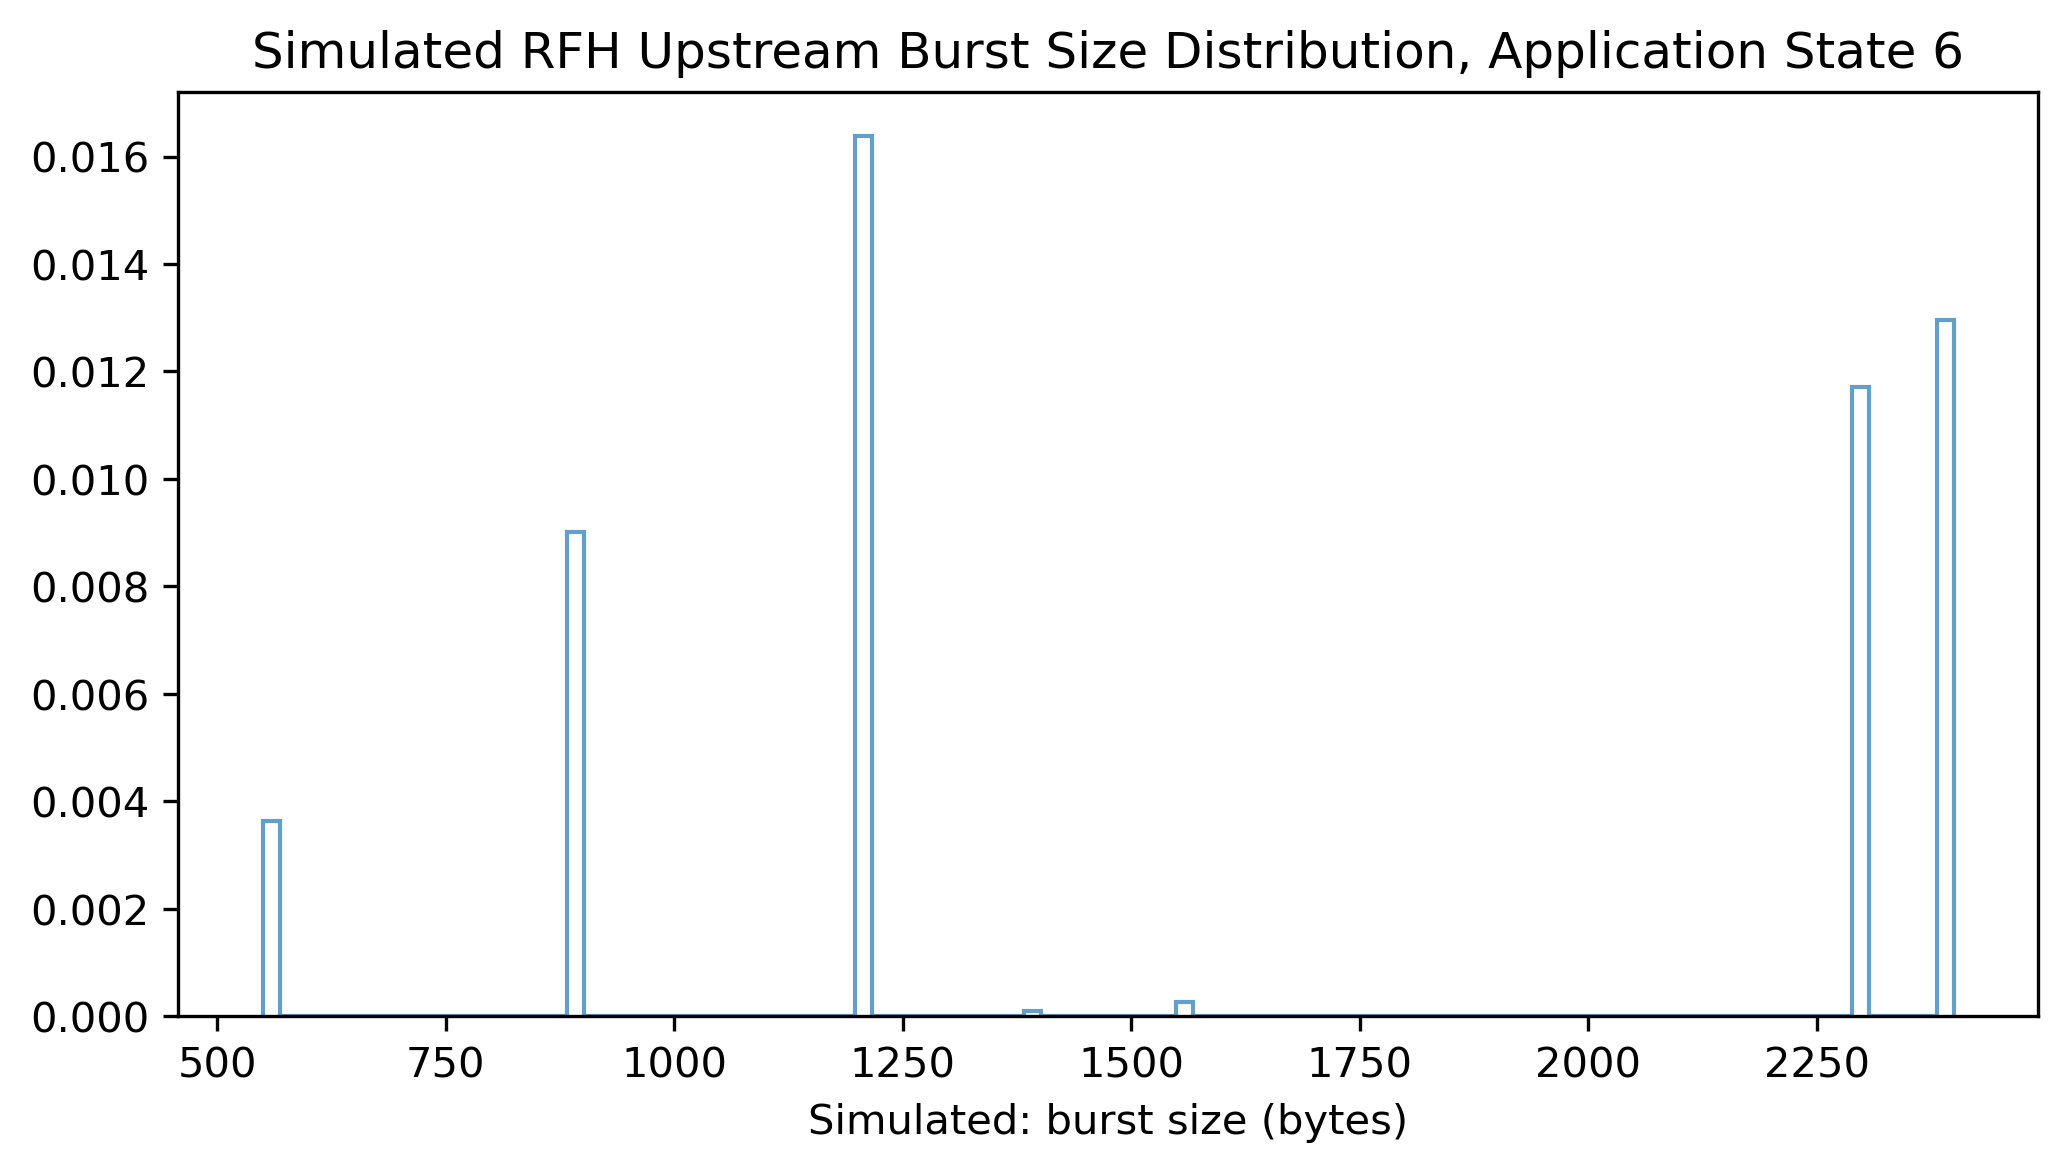

(0.0, 301.90000000000003)

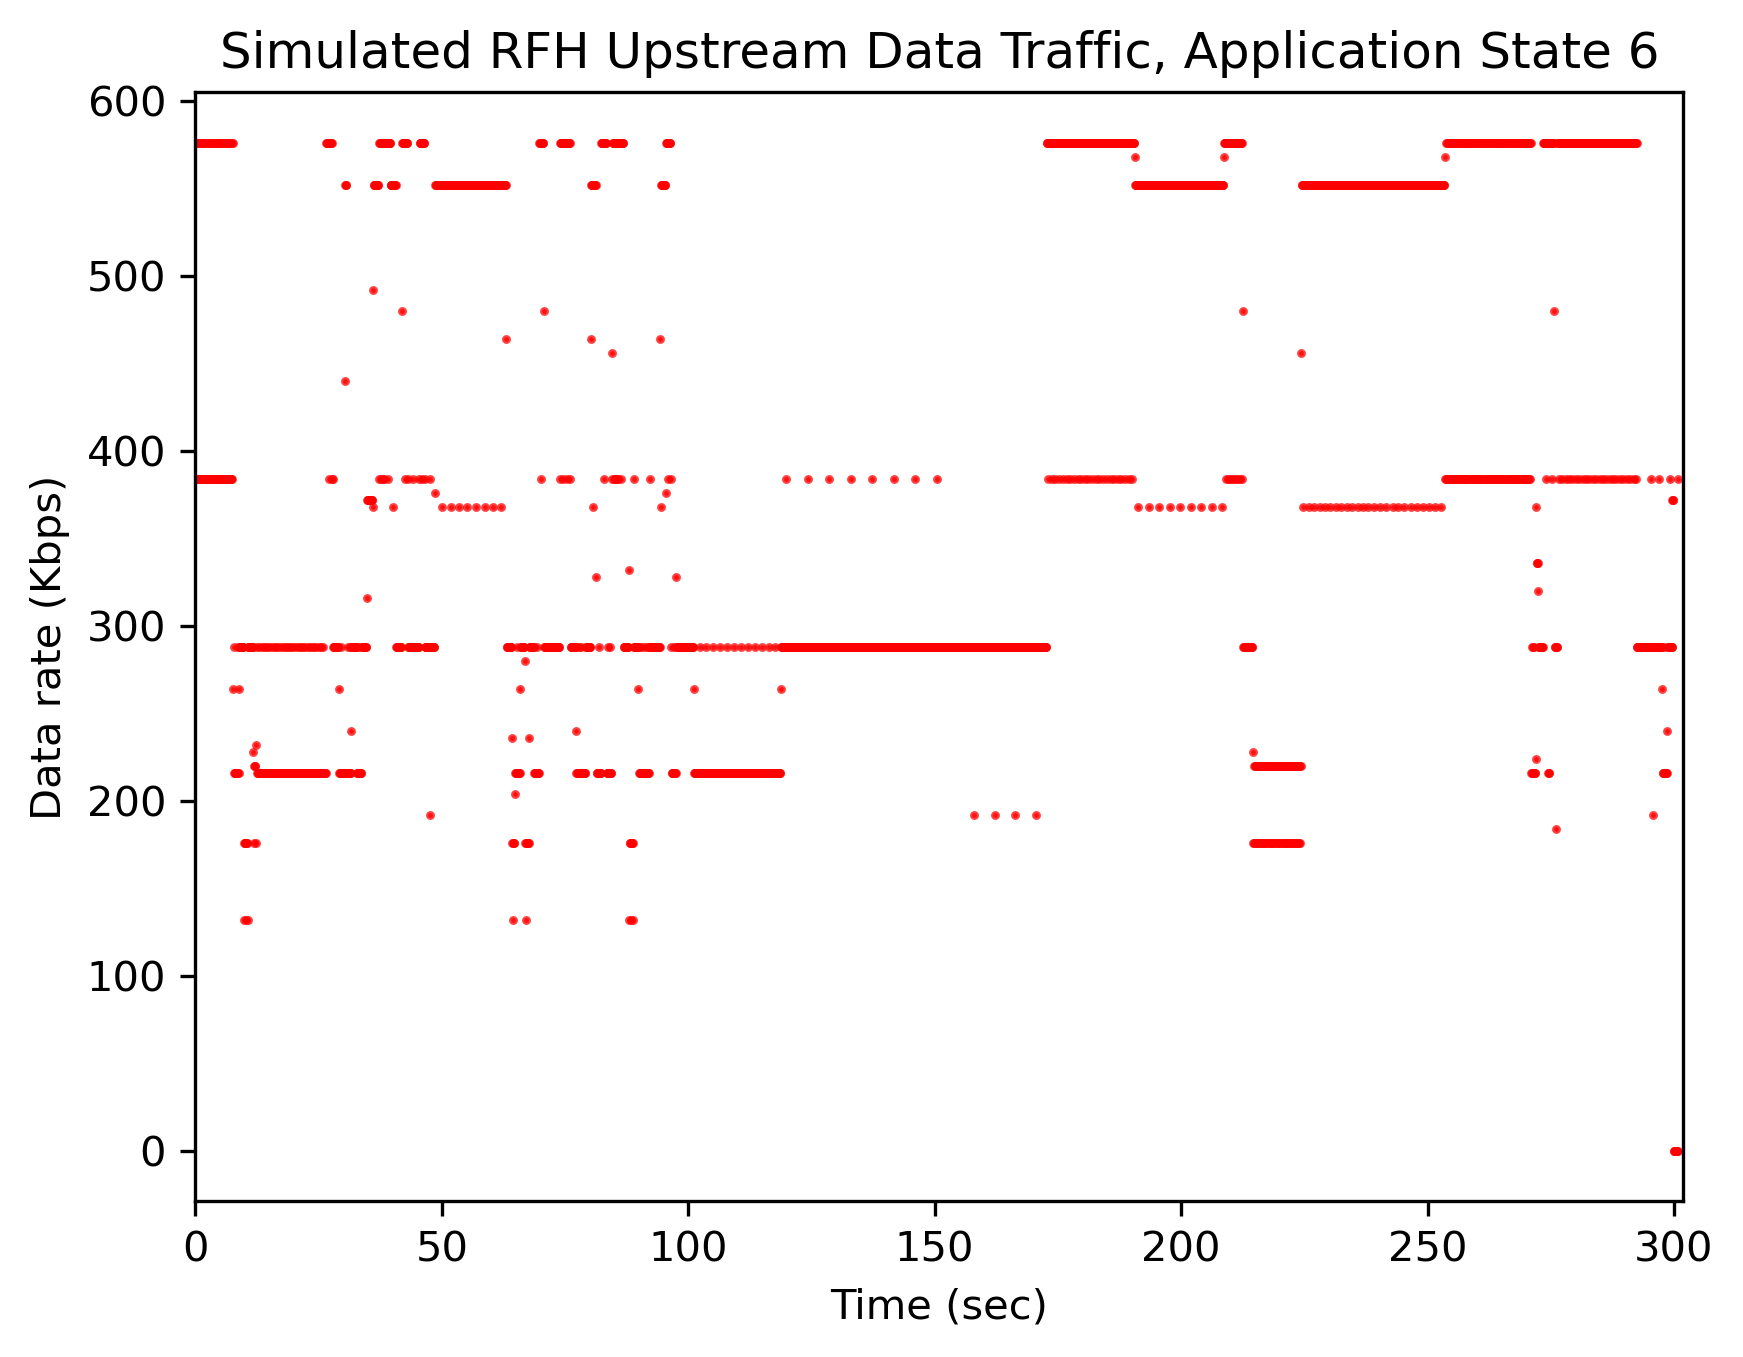

In [44]:
## Simulate the US traffic at a specific Application State

# pick the app state
sim_app_state = 6

df_rfh_us_burst_size_selected = df_rfh_us_burst_size[df_rfh_us_burst_size.app_state==sim_app_state]

sim_mat = [] # store the simulated frame size and time instances per the distribution of the samples

## Obtain Burst size CDF lists
lst_burst_size_vals = df_rfh_us_burst_size_selected.burst_size.tolist()
lst_burst_size_probs_pmf = df_rfh_us_burst_size_selected.pmf.tolist()
lst_burst_size_probs = [sum(lst_burst_size_probs_pmf[:i+1]) for i in range(len(lst_burst_size_probs_pmf))] # Get CDF vector from PMF vector

#print(lst_burst_size_probs)
#print(lst_burst_size_vals)


## Obtain IBT CDF lists
lst_ibt_vals = lst_ibt_sec
lst_ibt_probs = lst_ibt_cdf

# Step 1. Determine the initial burst size
# Generate a random number, and pick the initial burst size according to the ECDF distribution

# print("Step 1: Initial frame size")
burst_size_curr_idx = rand_index_gen(lst_burst_size_probs)
burst_size_curr = lst_burst_size_vals[burst_size_curr_idx]
# print("Initial frame size is ", burst_size_curr)

burst_time_curr = 0

# Save the first generated burst info
sim_mat.append([burst_time_curr, burst_size_curr])

# Create the following bursts
# Determine the interval length from the current burst to the next one 
burst_time_next = frame_next_time_gen_dl(burst_time_curr, lst_ibt_probs, lst_ibt_vals)

# Alternatively, can use the fixed ibt of the value 33.33 msec
# burst_time_next = burst_time_curr + 0.033 
# print("Current time: {}, Next time: {}".format(burst_time_curr, burst_time_next))

sim_time_stop = 300 # simulated traffic time

while burst_time_curr <= sim_time_stop:
    sim_mat.append([burst_time_curr, burst_size_curr])
  
    burst_size_curr = lst_burst_size_vals[rand_index_gen(lst_burst_size_probs)]
    
    burst_time_curr = burst_time_next
    burst_time_next = frame_next_time_gen_dl(burst_time_curr, lst_ibt_probs, lst_ibt_vals)
#     burst_time_next = burst_time_curr + 0.0333
    
    
print('Sim data size: ', len(sim_mat))


# Plot the burst size distribution in the simulated data set

lst_sim_size = [i[1] for i in sim_mat]

fig, ax = plt.subplots(figsize=(8, 4))

num_bins = 100

# plot the histogram
n, bins, patches = ax.hist(lst_sim_size, num_bins, 
                            density = 1, histtype='step', 
                           cumulative=False,
                            alpha = 0.7)

plt.title("Simulated RFH Upstream Burst Size Distribution, Application State " + str(sim_app_state))
plt.xlabel('Simulated: burst size (bytes)')
# plt.legend(loc='lower right') 
plt.show()


import math

step = .1 #sec

start_time = 0
end_time = math.ceil(sim_mat[-1][0]) + 1
arr_time = np.arange(start_time, end_time, step = step)
arr_time[1]

    
lst_byte = [0 for i in range(len(arr_time))]


import math

for i in sim_mat:
    len_tmp = i[1]#int(i[cols["data.len"]])
    time_tmp = i[0]#i[cols["frame.time_epoch"]]
    idx = math.ceil(time_tmp / step)
    lst_byte[idx-1] += len_tmp


lst_rate_kbps = [i * 8 / step / 1000 for i in lst_byte]

lst_rate_kbps_sim = []
for i in lst_rate_kbps:
    lst_rate_kbps_sim.append(i)

# print(lst_rate_kbps[:10])

_, ax = plt.subplots()
ax.scatter(arr_time, lst_rate_kbps, s = 5, color = 'r', alpha = 0.75, marker='.')
ax.set_title("Simulated RFH Upstream Data Traffic, Application State " + str(sim_app_state))
ax.set_xlabel("Time (sec)")
ax.set_ylabel("Data rate (Kbps)")
x_xlim = [0, arr_time[-1]+1]
ax.set_xlim(x_xlim[0], x_xlim[1])  

# 4. HMS 



| ![alt text](fig_hms_patterns_illustrated.png "HMS downstream traffic patterns illustrated") | 
|:--:| 
| *Figure 4. HMS downstream traffic patterns illustrated* |

The HMS link carries the fragmented MP4 traffic from the HMD to the remote monitor. Through traffic analysis, we found that the basic data transmission unit is the encrypted application data frame (TLSv1.2), beyond which is the burst of frames. We also notice that the burst size is not i.i.d, which indicates 1) each sequence of 15 consecutive bursts is concluded with an ending burst (we call as "Pilot") that has a bigger size than the other members, 2) the link data rate is manipulated by the HMD around the target rate, i.e., 5 Mbps for 720P according to the HoloLens2 document.


## 4.1. HMS Downstream

### 4.1.1. Frame Timing

The bursts including Pilots repeated at 15 Hz. 

         ibt       cdf
0  36.528210  0.000063
1  36.829177  0.000190
2  37.130144  0.000569
3  37.431112  0.000695
4  37.732079  0.001012
5  38.033046  0.001201
6  38.334013  0.001391
7  38.634980  0.001897
8  38.935948  0.002150
9  39.236915  0.002655
           ibt       cdf
190  93.711977  0.996965
191  94.012944  0.997345
192  94.313912  0.997598
193  94.614879  0.997977
194  94.915846  0.998356
195  95.216813  0.998609
196  95.517780  0.998862
197  95.818748  0.999115
198  96.119715  0.999178
199  96.420682  0.999431


(36.0, 97.0)

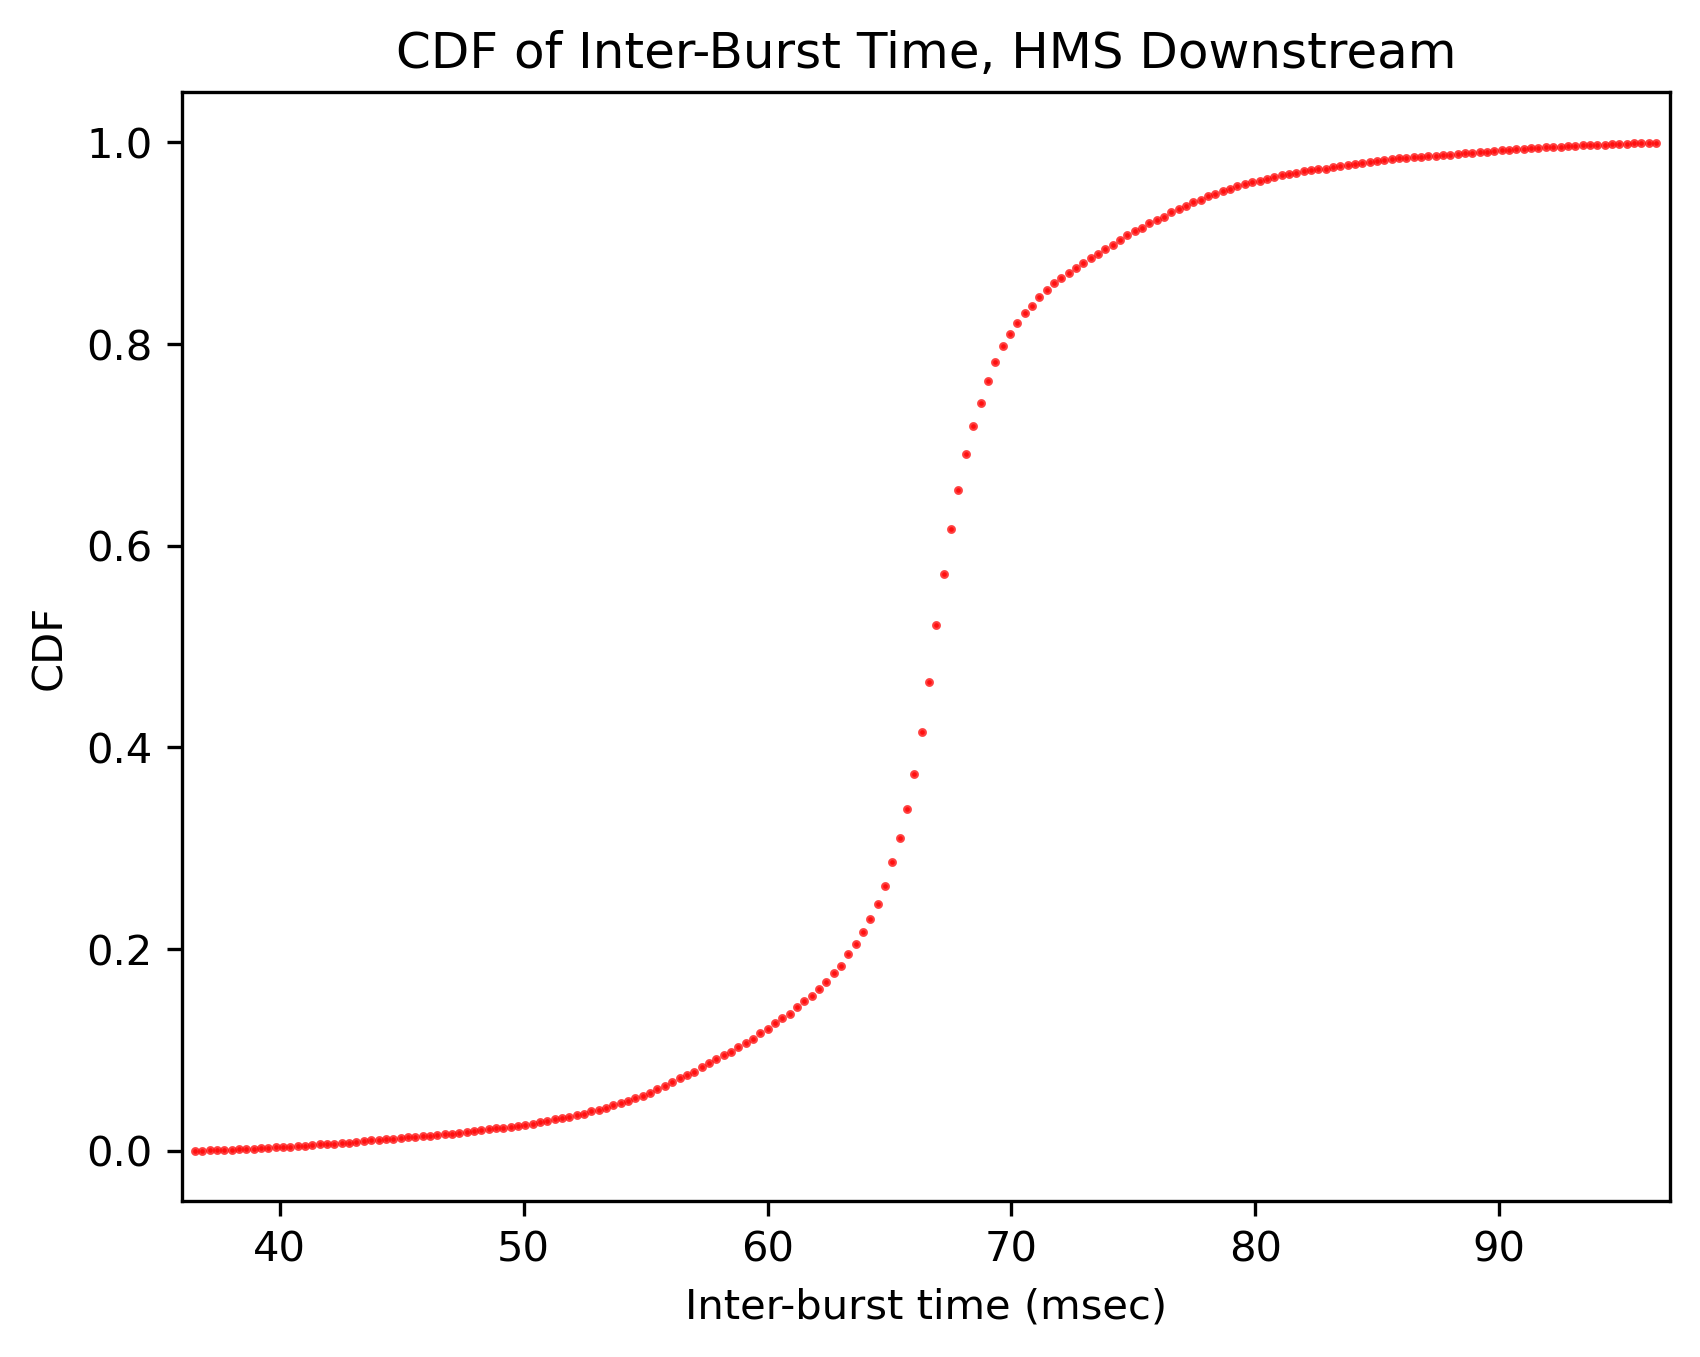

In [18]:
df_hms_ds_ibt = pd.read_csv('hms_ds_ibt_msec_cdf.csv', delimiter=";")

print(df_hms_ds_ibt.head(10))

print(df_hms_ds_ibt.tail(10))

lst_ibt_msec = df_hms_ds_ibt.ibt.tolist()
lst_ibt_sec = [i/1000 for i in lst_ibt_msec]
lst_ibt_cdf = df_hms_ds_ibt.cdf.tolist()

_, ax = plt.subplots()
ax.scatter(lst_ibt_msec, lst_ibt_cdf, s = 5, color = 'r', alpha = 0.75, marker='.')
ax.set_title("CDF of Inter-Burst Time, HMS Downstream")
ax.set_xlabel("Inter-burst time (msec)")
ax.set_ylabel("CDF")
x_xlim = [36, 97]
ax.set_xlim(x_xlim[0], x_xlim[1])    
# ax.set_xticks(np.arange(x_xlim[0], x_xlim[1], np.round_((x_xlim[1]-x_xlim[0])/10)))  

### 4.1.2. Joint Timing and Size Distribution

Based on our observation of the collected traffic data, we cannot simply adopt burst-wise distributions to simulate the HMS traffic because 1) the neighboring bursts are correlated and 2) the data rate is under control. Therefore, we introduce a joint timing and size distribution to formulate the traffic model.

![alt text](fig_hms_model_vars_illustrated.png "HMS downstream model variables illustrated")

We consider the control of the HMS traffic is based on a super-burst cycle (SBC) that contains 15 bursts and lasts for around 1 sec. To simulate the individual bursts in each SBC, which need the information of their timestamps and burst sizes, we formulate a joint distribution addressing the intra-cycle delay $\lambda_k$ and aggregated burst size $\beta_k$ of each burst member $k$. The IBT of burst member $k$ from $k-1$ can be calculated by $\lambda_{k+1}-\lambda_k$ while the burst size $B_k$ can be calculated by $\beta_{k+1}-\beta_k$.

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


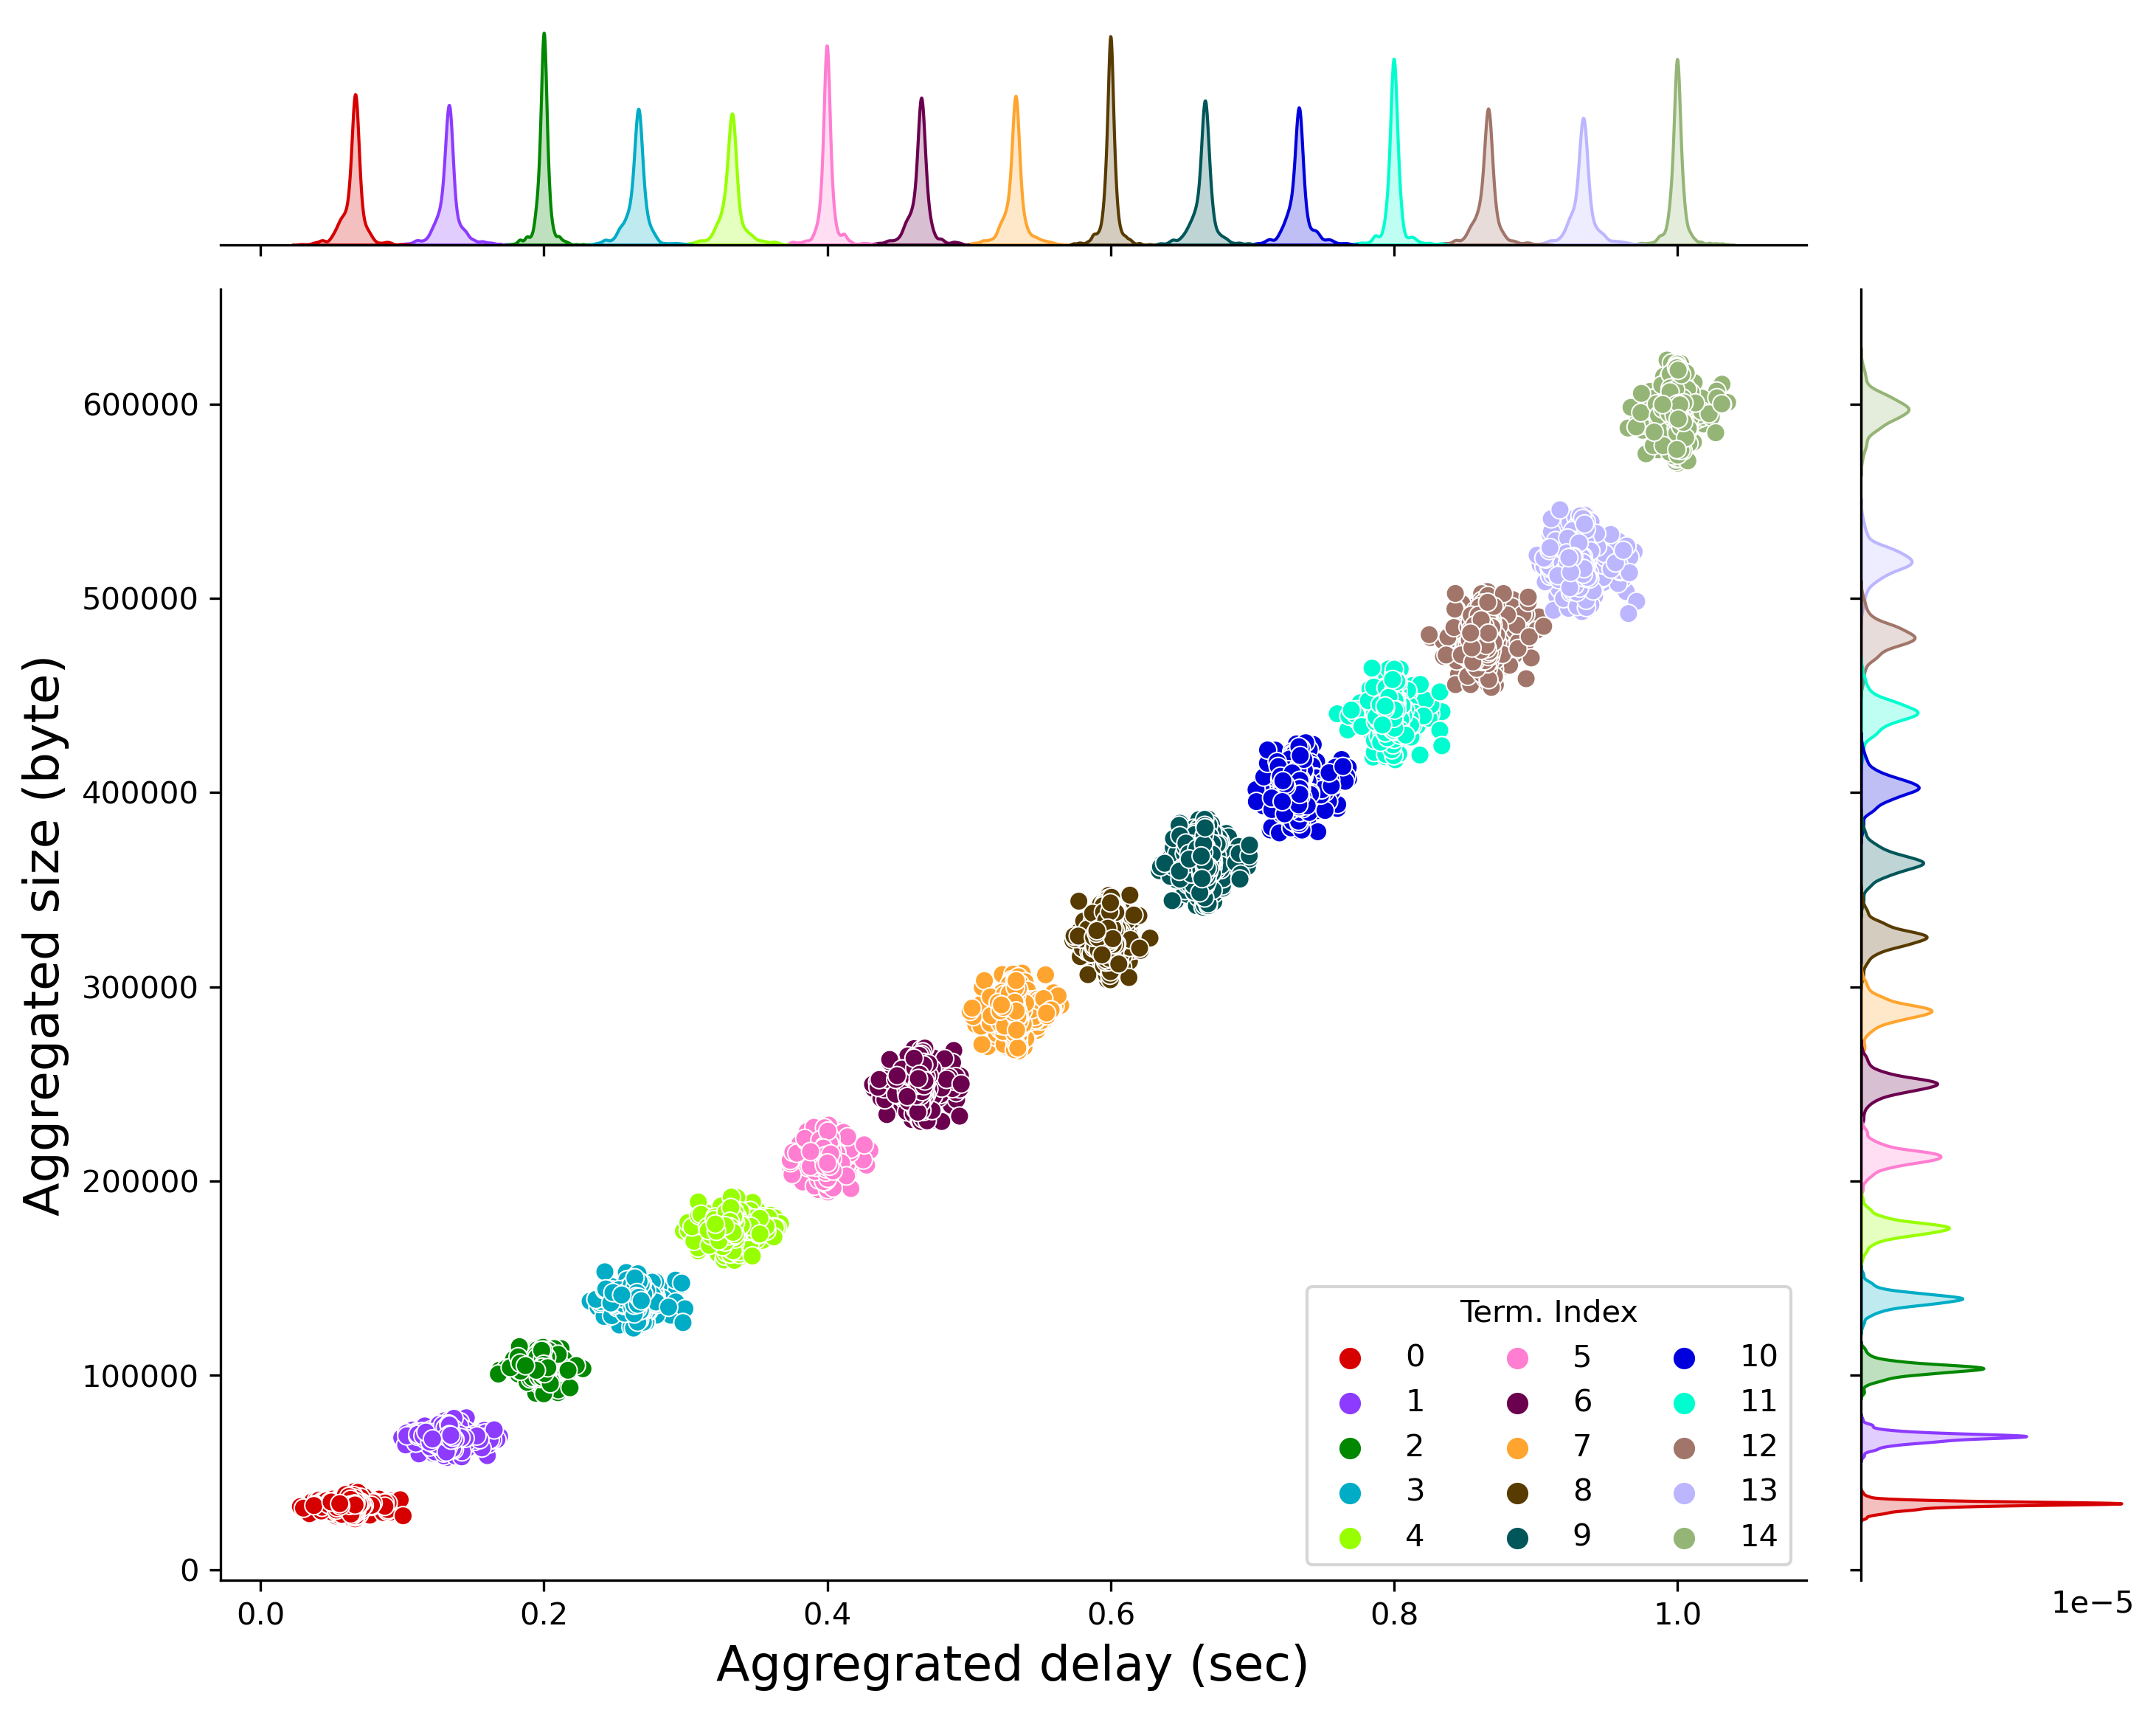

In [15]:
df_hms_ds = pd.read_csv('hms_ds_joint_dist.csv')
df_hms_ds.head

import colorcet as cc
import seaborn as sns
colors = sns.color_palette(cc.glasbey, n_colors=15)
h = sns.jointplot(data=df_hms_ds, x="Duration", y="Sum_Size", hue="Term_Index", palette=colors)
h.set_axis_labels('Aggregrated delay (sec)', 'Aggregated size (byte)', fontsize=16)
h.fig.set_size_inches((10, 8)) 
h.ax_joint.legend(ncol=3, loc="lower right", title='Term. Index')

### 4.1.2. Implementation Example in Python

The example code is based on Python library functions from Pandas.

Each simulation round will generate a full superframe of 15 bursts over around 1 sec. The burst will be the minimum data PDU in the simulated traffic flow. 

In the SBC, we assume the pilot burst is located at the end.

The generation can start either from Burst 0 (forwards) or Pilot Burst 14 (backwards). We have verified that the simulated traffic in both approaches 

The input 1 is the last SBC's Pilot Burst 14 time. 

intra-superframe burst list (ISFBL) of depth 0 - 14

The input 2 is the two-variate joint burst delay profile (BDP)-aggregated burst size (ABS) empirical CDF per burst index(BID).

The output is a list of size-time pairs for 15 new bursts (14 regular bursts + 1 ending Pilot burst).

Steps:
- Load the previous superframe's ending burst time t_0

- Use the IBT CDF to determine the value of y, i.e., the interval length between Burst 0 and t_0, P{IBT_0 < y}=x_i, x_i from a uniform r.v. in [0,1)

- Use P{IBT_0 < x} to form a conditional burst size CDF to determine the value of Burst 0's size, P{BSize < s | IBT_0<y}=x_s, x_s from a uniform r.v. in [0, 1). P{BSize < s | IBT_0<y} is formulated by creating the empirical CDF from the samples with IBT_0<y

- Given y in S_0, determine the y value in S_1, then formulate the size CDF in S_1



In [16]:
import random
import time

## Forward (fwd)
# determine the delay duration and accumulated burst size of the burst tap i from the previous burst tap (i-1)

def func_tap_delay_dur_gen_fwd(in_tap_delay_prev, in_tap_dur_vals):
    # Obtain the qualified sample list (in the ascending order by duration)
    tmp_tap_dur_vals_ = [i for i in in_tap_dur_vals if i >= in_tap_delay_prev]
    tmp_tap_dur_cdf_ = 1. * np.arange(len(tmp_tap_dur_vals_)) / (len(tmp_tap_dur_vals_) - 1)
    
    # generate a random number between 0 and 1
    random.seed(int(str(time.time()).split('.')[1]))
    tmp_rand_ = random.uniform(0, 1) 
    
    # Use the random number to decide the size value
    lst_less_eq_ = [i for i in tmp_tap_dur_cdf_ if i <= tmp_rand_]
    out_ = tmp_tap_dur_vals_[len(lst_less_eq_)-1]
    
    return out_


def func_tap_size_sum_gen_fwd(in_tap_dur, in_tap_size, in_tap_dur_vals, in_tap_size_vals):
    # Obtain the qualified sample list (all sizes paired with the delay dur >= the input dur)
    epsilon = 0.01
    tmp_tap_size_vals_ = [in_tap_size_vals[i] for i in range(len(in_tap_dur_vals)) 
                          if in_tap_dur_vals[i]>=in_tap_dur and in_tap_dur_vals[i]<=in_tap_dur+epsilon
                          and in_tap_size_vals[i]>in_tap_size] 
#                           if in_tap_dur_vals[i]>=in_tap_dur and in_tap_size_vals[i]>in_tap_size] 

    if len(tmp_tap_size_vals_) <= 1:
        return tmp_tap_size_vals_[0]
    
    tmp_tap_size_cdf_ = 1. * np.arange(len(tmp_tap_size_vals_)) / (len(tmp_tap_size_vals_) - 1)
    
    # generate a random number between 0 and 1
    random.seed(int(str(time.time()).split('.')[1]))
    tmp_rand_ = random.uniform(0, 1) # generate a random number between 0 and 1
    
    # Use the random number to decide the size value
    lst_less_eq_ = [i for i in tmp_tap_size_cdf_ if i <= tmp_rand_]
    out_ = tmp_tap_size_vals_[len(lst_less_eq_)-1]
    
    return out_


def func_tap_size_sum_gen_fwd_rate_match(in_tap_dur, in_tap_size, in_tap_dur_vals, in_tap_size_vals, in_target_rate_):
    # Obtain the qualified sample list (all sizes paired with the delay dur >= the input dur)
    tmp_tap_index_ = [i for i in range(len(in_tap_dur_vals)) 
                          if in_tap_dur_vals[i]>=in_tap_dur and in_tap_size_vals[i]>in_tap_size]
    
    if len(tmp_tap_index_) <= 1:
        return in_tap_dur_vals[tmp_tap_index_[0]], in_tap_size_vals[tmp_tap_index_[0]]
    
    j = 0
    j_sel = j
    rate_j = in_tap_size_vals[j]*8 / in_tap_dur_vals[j] / 1000 # kbps
    j += 1
    
    while j < len(tmp_tap_index_):
        
        rate_j_new = in_tap_size_vals[j]*8 / in_tap_dur_vals[j] / 1000 # kbps
        
        if abs(rate_j_new - in_target_rate_) < abs(rate_j - in_target_rate_):
            j_sel = j
            rate_j = rate_j_new
            
        j += 1
            
    out_ = in_tap_dur_vals[j_sel], in_tap_size_vals[j_sel]
    
    return out_


## Backward (bwd)
# determine the delay duration and accumulated burst size of the burst tap i from the next burst tap i+1 (within the same superframe)

def func_tap_delay_dur_gen_bwd(in_tap_delay_next, in_tap_dur_vals):
    # Obtain the qualified sample list (in the ascending order by duration)
    tmp_tap_dur_vals_ = [i for i in in_tap_dur_vals if i <= in_tap_delay_next]
    
    if len(tmp_tap_dur_vals_) <= 1:
        return tmp_tap_dur_vals_[0], "limit"
    
    tmp_tap_dur_cdf_ = 1. * np.arange(len(tmp_tap_dur_vals_)) / (len(tmp_tap_dur_vals_) - 1)
    
    # generate a random number between 0 and 1
    random.seed(int(str(time.time()).split('.')[1]))
    tmp_rand_ = random.uniform(0, 1) 
    
    # Use the random number to decide the size value
    lst_less_eq_ = [i for i in tmp_tap_dur_cdf_ if i <= tmp_rand_]
    out_ = tmp_tap_dur_vals_[len(lst_less_eq_)-1]
    
    return out_, 'normal'


def func_tap_size_sum_gen_bwd(in_tap_dur, in_tap_size, in_tap_dur_vals, in_tap_size_vals):
    # Obtain the qualified sample list (all sizes paired with the delay dur >= the input dur)
    epsilon = 0.005
    tmp_tap_size_vals_ = [in_tap_size_vals[i] for i in range(len(in_tap_dur_vals)) 
                          if in_tap_dur_vals[i]<=in_tap_dur 
                          and in_tap_dur_vals[i]>=in_tap_dur-epsilon
                          and in_tap_size_vals[i]<=in_tap_size] 
    
    if len(tmp_tap_size_vals_) <= 1:
        print("Input: dur {}, size {}; return {}".format(in_tap_dur, in_tap_size, tmp_tap_size_vals_))
        return tmp_tap_size_vals_[0], 'limit'
    
    tmp_tap_size_cdf_ = 1. * np.arange(len(tmp_tap_size_vals_)) / (len(tmp_tap_size_vals_) - 1)
    
    # generate a random number between 0 and 1
    random.seed(int(str(time.time()).split('.')[1]))
    tmp_rand_ = random.uniform(0, 1) # generate a random number between 0 and 1
    
    # Use the random number to decide the size value
    lst_less_eq_ = [i for i in tmp_tap_size_cdf_ if i <= tmp_rand_]
    out_ = tmp_tap_size_vals_[len(lst_less_eq_)-1]
    
    return out_, "normal"

End of simulated traffic
[4810.872, 4728.84, 4728.84, 4728.84, 4728.84, 4778.664, 4809.296, 4634.176, 4784.872, 4883.544]


(4000.0, 6000.0)

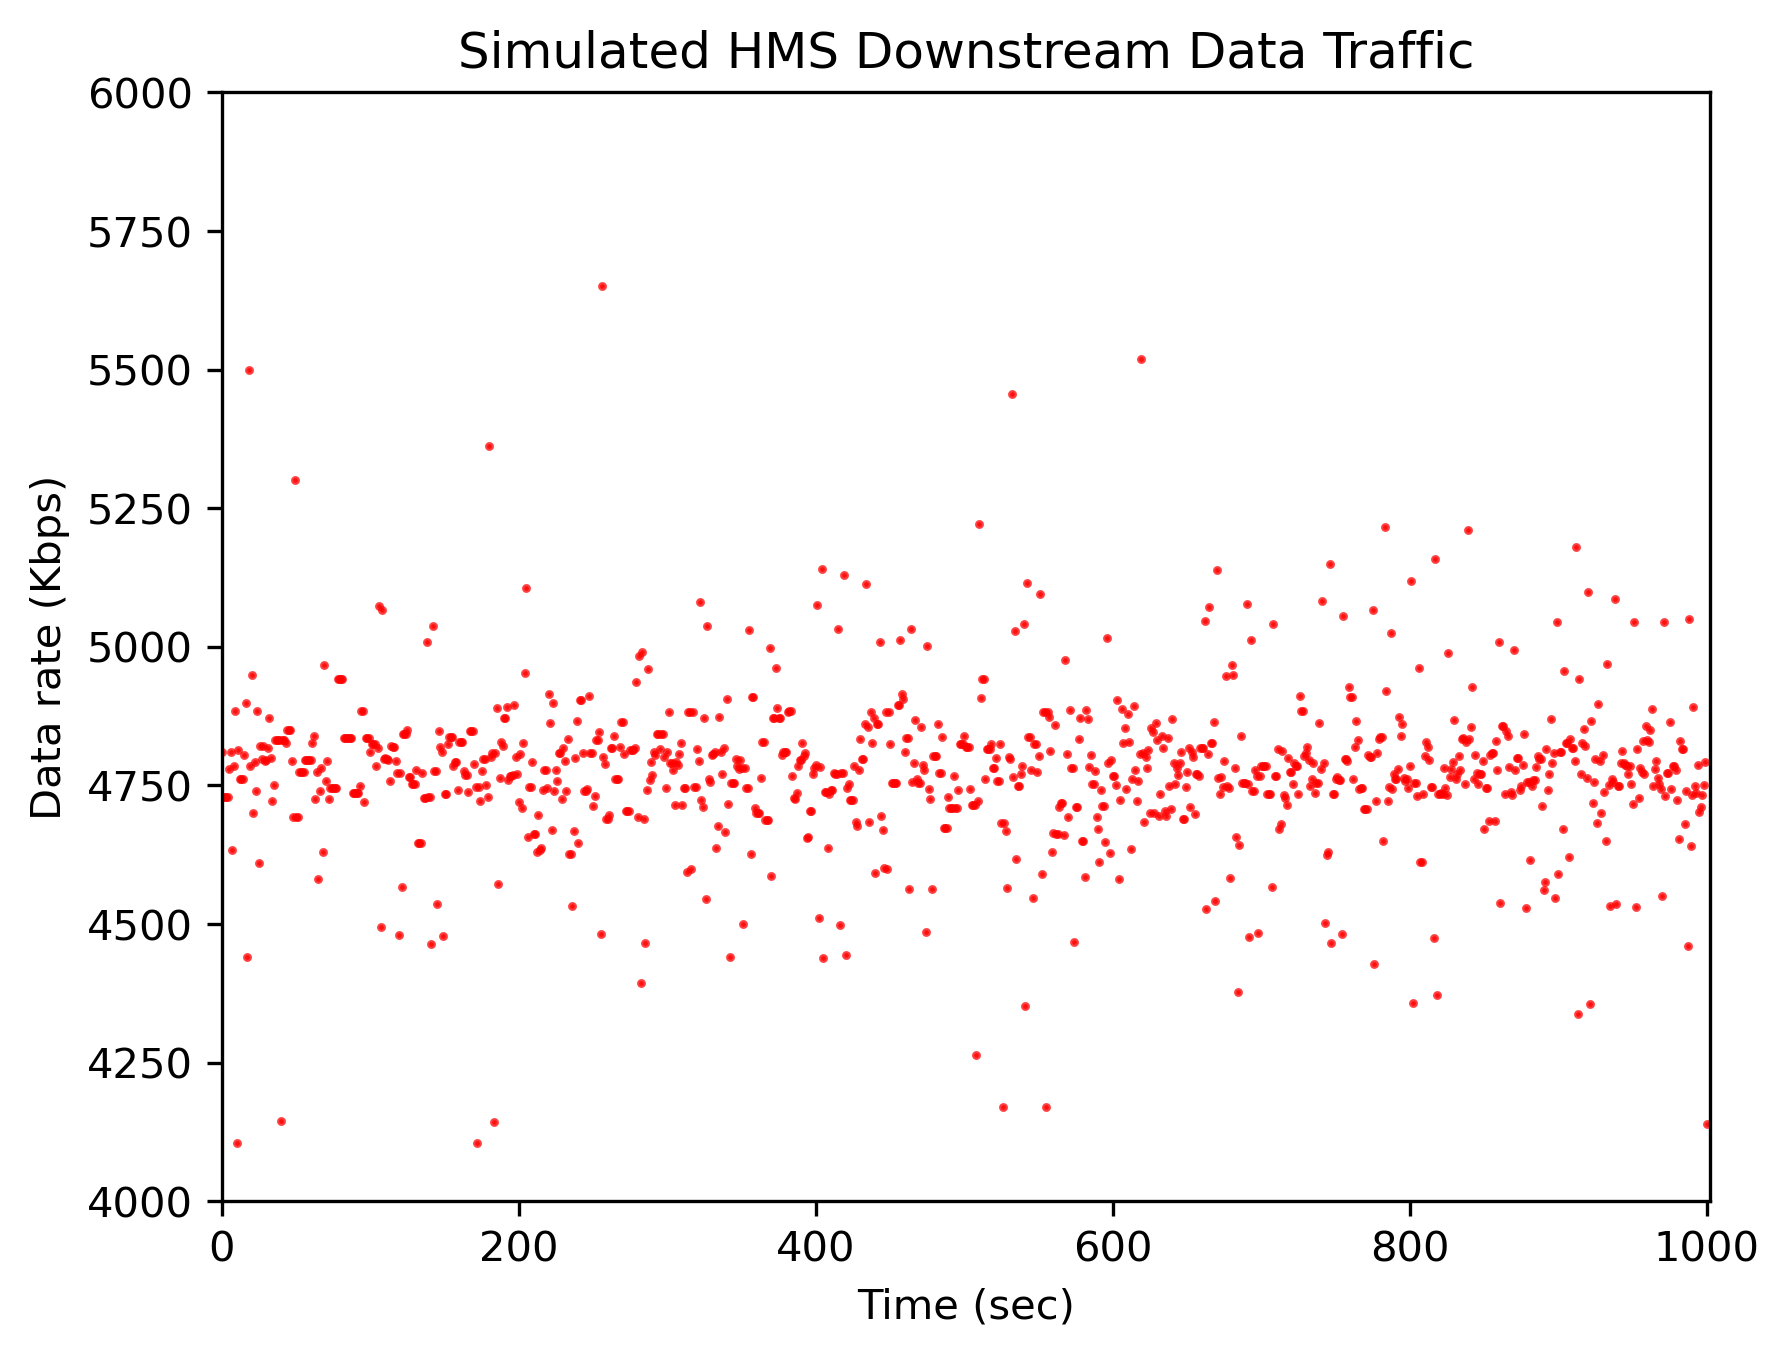

In [17]:
## The bursts in a superframe are determined from the smallest index, i.e., 0, 1, 2, ..., 13, 14
## We call it in the forward generation order

# # ana_mat_intra_sframe_
# lst_intra_sf_dur_ = [i[0] for i in ana_mat_intra_sframe_]
# lst_intra_size_sum_ = [i[1] for i in ana_mat_intra_sframe_]
# lst_intra_idx_ = [i[2] for i in ana_mat_intra_sframe_]


# #create DataFrame
# df = pd.DataFrame({'Duration': [i for i in lst_intra_sf_dur_],
#                    'Size': [i for i in lst_intra_size_sum_],
#                    'Group_Index': [i for i in lst_intra_idx_]})

# groups = df.groupby('Group_Index')



#create DataFrame
df_filtered_ = df_hms_ds

groups = df_filtered_.groupby('Term_Index')


dict_dur_ = {}
dict_size_ = {}

for name, group in groups:
    df_tmp = group.sort_values(['Duration', 'Sum_Size'],ascending=True)
#     print(df_tmp.head(3))
    dict_dur_[name] = df_tmp.Duration.tolist()
    dict_size_[name] = df_tmp.Sum_Size.tolist()
    
    
    
def func_sframe_gen_fwd(in_sf_t_start, in_dict_dur_, in_dict_size_):
    out_lst_burst_rec_ = []
    
    tmp_tap_dur_prev_ = 0
    tmp_tap_size_prev_ = 0
    
    for tap_i in range(15): # default 15 bursts in a sframe
        # Calculate
        tap_i_dur_ = func_tap_delay_dur_gen_fwd(tmp_tap_dur_prev_, in_dict_dur_[tap_i])
        tap_i_size_ = func_tap_size_sum_gen_fwd(tap_i_dur_, tmp_tap_size_prev_, in_dict_dur_[tap_i], in_dict_size_[tap_i])
        
        if tap_i == 0:
            tap_i_ibt_ = tap_i_dur_
            tap_i_bsize_ = tap_i_size_
        else:
            tap_i_ibt_ = tap_i_dur_ - tmp_tap_dur_prev_
            tap_i_bsize_ = tap_i_size_ - tmp_tap_size_prev_
        
#         print("Tap {}: dur {}, ibt {}; size_sum {}, size {}".format(tap_i, tap_i_dur_, tap_i_ibt_, tap_i_size_, tap_i_bsize_))
        
        # Record
        out_lst_burst_rec_.append([in_sf_t_start + tap_i_dur_, tap_i_bsize_])
        
        # Update
        tmp_tap_dur_prev_ = tap_i_dur_
        tmp_tap_size_prev_ = tap_i_size_
        
    
    out_sf_t_end = out_lst_burst_rec_[-1][0]
        
    return out_sf_t_end, out_lst_burst_rec_
        
    
t_sim_start = 0

t_sim_end = 1000 # sec

sim_mat_rc_fwd_ = []

t_curr = t_sim_start

while t_curr < t_sim_end:
#     print("Time: ", t_curr)
    # add a new superframe 
    t_curr, lst_new_sf_burst = func_sframe_gen_fwd(t_curr, dict_dur_, dict_size_)
    sim_mat_rc_fwd_ += lst_new_sf_burst
    
print("End of simulated traffic")


# sim_mat_rc_fwd_[:20]


# Throughput of the simulated data stream

import math

step = 1 #sec

start_time = 0
end_time = math.ceil(sim_mat_rc_fwd_[-1][0]) + 1
arr_time = np.arange(start_time, end_time, step = step)
arr_time[1]

# for i in arr_time:
#     print(i)
    
lst_byte = [0 for i in range(len(arr_time))]

# print(lst_rate)

import math

for i in sim_mat_rc_fwd_:
    len_tmp = i[1]#int(i[cols["data.len"]])
    time_tmp = i[0]#i[cols["frame.time_epoch"]]
    idx = math.ceil(time_tmp / step)
    lst_byte[idx-1] += len_tmp
    
# print(lst_byte[300:350])

lst_rate_kbps = [i * 8 / step / 1000 for i in lst_byte]

lst_rate_kbps_sim_rc_fwd_ = []
for i in lst_rate_kbps:
    lst_rate_kbps_sim_rc_fwd_.append(i)

print(lst_rate_kbps[:10])

_, ax = plt.subplots()
ax.scatter(arr_time, lst_rate_kbps, s = 5, color = 'r', alpha = 0.75, marker='.')
ax.set_title("Simulated HMS Downstream Data Traffic")
ax.set_xlabel("Time (sec)")
ax.set_ylabel("Data rate (Kbps)")
x_xlim = [0, arr_time[-1]+1]
ax.set_xlim(x_xlim[0], x_xlim[1])  
ax.set_ylim(4000, 6000) 

## 4.2. HMS Upstream (N/A)

# End of Report